In [1]:
import pandas as pd
import json
from os import listdir
from os.path import isfile, join
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.ensemble import IsolationForest
from PIL import Image
from matplotlib.ticker import FuncFormatter
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import csv
import math

In [2]:

rows = []

with open('all_player_coordinates.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name] + list(a))

#

df_trajectory = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

df_trajectory

,Player,X,Y,Z
0,Mr_PsIx0pAt,1684.78096,2622.97376,769.06496
1,Mr_PsIx0pAt,1840.16768,2641.64448,577.09032
2,Mr_PsIx0pAt,2063.71696,2689.33664,339.48888
3,Mr_PsIx0pAt,2201.91184,2755.93632,177.51614
4,Mr_PsIx0pAt,2266.91856,2769.29344,126.88819
...,...,...,...,...
203466,Luchari,973.75184,2321.50080,702.95344
203467,Luchari,890.59792,2534.75936,463.64952
203468,Luchari,805.73896,2753.64288,228.87010
203469,Luchari,766.17560,2865.87840,122.33683


In [2]:
train_size = 0.70
validation_size = 0.15
test_size = 0.15
rows = []
def combine_columns(df):
    new_df = df.copy()
    new_df['XY'] = list(zip(new_df['X'], new_df['Y']))
    new_df = new_df[['XY', 'Z']]
    return new_df


with open('all_player_coordinates_landing_test.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name]+list(a))  
df = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

df_train, df_temp = train_test_split(df, train_size=train_size, random_state=42)
validation_size_adjusted = validation_size / (validation_size + test_size)
df_validation, df_test = train_test_split(df_temp, train_size=validation_size_adjusted, random_state=42)

df_train = combine_columns(df_train)
df_validation = combine_columns(df_validation)
df_test = combine_columns(df_test)

df_train, df_validation, df_test

(                              XY           Z
 75182   (1922.93888, 2233.43488)   28.713990
 103777     (2439.264, 2964.7904)  109.696410
 95904       (1002.13, 3347.9936)   17.939847
 73856   (2301.61984, 2853.80128)  109.401250
 42173    (1924.5368, 2221.17904)   28.713673
 ...                          ...         ...
 76820   (2495.34672, 1817.70096)   62.809090
 110268   (2252.41984, 1417.2072)   25.793723
 103694  (1664.80528, 1792.34128)   70.532930
 860     (2445.31776, 1827.59744)   48.821275
 15795   (1289.82056, 2695.09792)   74.805760
 
 [82682 rows x 2 columns],
                               XY           Z
 117608   (1933.16736, 1503.5952)   40.270055
 37978    (883.36592, 1033.41864)  127.385440
 22321   (2573.15424, 2168.08176)   45.961100
 5726    (1726.22816, 1419.46864)   65.396935
 27581     (2078.01424, 1965.064)  100.911730
 ...                          ...         ...
 10540   (2271.27088, 1008.25448)   38.631395
 110871  (2584.05104, 1918.64928)   50.223745
 1155

In [3]:
rows = []
def combine_columns(df):
    new_df = df.copy()
    new_df['XY'] = list(zip(new_df['X'], new_df['Y']))
    new_df = new_df[['XY', 'Z']]
    return new_df


with open('new_map_all_player_coordinates_landing_test.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name]+list(a))  
df = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

df_test_new_map = combine_columns(df)


df_test_new_map

,XY,Z
0,"(2306.94672, 1811.23984)",14.658261
1,"(3242.73664, 2284.95008)",24.119673
2,"(1959.83696, 3560.63232)",10.253487
3,"(1986.84848, 3508.02112)",5.716766
4,"(2326.8432, 1864.47184)",15.077343
...,...,...
21953,"(2863.6016, 3499.64256)",12.056275
21954,"(2056.02944, 582.71456)",11.322291
21955,"(2145.58048, 520.39592)",12.643744
21956,"(2052.7272, 567.98728)",51.591725


In [4]:

# Load the image using PIL
img = Image.open("C:/Users/robuc/Documents/GitHub/New_Project/Data/roads.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
coordinates_array = np.array(coordinates)

In [5]:
# Load the image using PIL
img = Image.open("C:/Users/robuc/Documents/GitHub/New_Project/Data/roads_new_map.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
coordinates_array_new_map = np.array(coordinates)

In [6]:

# Load the image using PIL
img = Image.open("C:/Users/robuc/Documents/GitHub/New_Project/Data/buildings.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
building_coordinates_array = np.array(coordinates)

In [7]:
# Load the image using PIL
img = Image.open("C:/Users/robuc/Documents/GitHub/New_Project/Data/buildings_new_map.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
building_coordinates_array_new_map = np.array(coordinates)

In [8]:
building_coordinates_array

road_build = pd.DataFrame()
road_build['Building'] = building_coordinates_array[:,2]
road_build['Roads'] = coordinates_array[:,2]
road_build.corr()

,Building,Roads
Building,1.000000,-0.003463
Roads,-0.003463,1.000000


In [9]:
grid_size = 10
grid_shape = (grid_size, grid_size)
def calculate_nearest_road_distances(coordinates_array,grid_size):
    road_points = coordinates_array[coordinates_array[:, 2] == 255][:, :2]

    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store building counts for each grid
    grid_building_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}
    

    # Count buildings in each grid
    for x, y in road_points:
            grid_x = int(x / grid_square_size)
            grid_y = int(y / grid_square_size)
            grid_building_counts[(grid_x, grid_y)] += 1

    return grid_building_counts




updated = calculate_nearest_road_distances(coordinates_array,grid_size)
model_df = pd.DataFrame.from_dict(updated, orient='index', columns=['Road_Count'])

print(model_df)

        Road_Count
(0, 0)           0
(0, 1)         700
(0, 2)         355
(0, 3)         719
(0, 4)           0
...            ...
(9, 5)           0
(9, 6)           0
(9, 7)           0
(9, 8)           0
(9, 9)           0

[100 rows x 1 columns]


In [10]:
def count_buildings_in_grid(building_coordinates_array, grid_size):

    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store building counts for each grid
    grid_building_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count buildings in each grid
    for x, y, value in building_coordinates_array:
        if value == 255:  # Check if the pixel is marked as a building
            grid_x = int(x / grid_square_size)
            grid_y = int(y / grid_square_size)
            grid_building_counts[(grid_x, grid_y)] += 1


    return grid_building_counts


# You would call the function like this:
updated_2 = count_buildings_in_grid(building_coordinates_array, grid_size) 
model_df['Building_Count'] = updated_2
model_df

,Road_Count,Building_Count
"(0, 0)",0,43
"(0, 1)",700,561
"(0, 2)",355,204
"(0, 3)",719,247
"(0, 4)",0,28
...,...,...
"(9, 5)",0,218
"(9, 6)",0,290
"(9, 7)",0,0
"(9, 8)",0,0


In [11]:
updated_new = calculate_nearest_road_distances(coordinates_array_new_map,grid_size)
model_df_new = pd.DataFrame.from_dict(updated_new, orient='index', columns=['Road_Count'])
model_df_new

,Road_Count
"(0, 0)",0
"(0, 1)",0
"(0, 2)",0
"(0, 3)",2
"(0, 4)",0
...,...
"(9, 5)",0
"(9, 6)",0
"(9, 7)",0
"(9, 8)",0


In [12]:
updated_2_new = count_buildings_in_grid(building_coordinates_array_new_map, grid_size) 
model_df_new['Building_Count'] = updated_2_new
model_df_new

,Road_Count,Building_Count
"(0, 0)",0,0
"(0, 1)",0,0
"(0, 2)",0,0
"(0, 3)",2,0
"(0, 4)",0,0
...,...,...
"(9, 5)",0,0
"(9, 6)",0,0
"(9, 7)",0,0
"(9, 8)",0,0


In [13]:

def grid_to_center(center, grid_size):
    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store player counts for each grid
    grid = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count players in each grid
    for x in range(x_grids):
        for y in range(y_grids):
            grid_center_x = (x * grid_square_size) + (grid_square_size / 2)
            grid_center_y = (y * grid_square_size) + (grid_square_size / 2)
            distance = math.sqrt((grid_center_x - center[0])**2 + (grid_center_y - center[1])**2)
            grid[(x, y)] = distance

    return grid

updated_4=grid_to_center([2043,2043],grid_size)
model_df['Grid_Distance'] = updated_4
model_df

,Road_Count,Building_Count,Grid_Distance
"(0, 0)",0,43,2599.607370
"(0, 1)",700,561,2328.062972
"(0, 2)",355,204,2101.746950
"(0, 3)",719,247,1936.581421
"(0, 4)",0,28,1849.026576
...,...,...,...
"(9, 5)",0,218,1860.069698
"(9, 6)",0,290,1949.230515
"(9, 7)",0,0,2115.344946
"(9, 8)",0,0,2342.095899


In [14]:
updated_4_new=grid_to_center([2043,2043],grid_size)
model_df_new['Grid_Distance'] = updated_4_new
model_df_new

,Road_Count,Building_Count,Grid_Distance
"(0, 0)",0,0,2599.607370
"(0, 1)",0,0,2328.062972
"(0, 2)",0,0,2101.746950
"(0, 3)",2,0,1936.581421
"(0, 4)",0,0,1849.026576
...,...,...,...
"(9, 5)",0,0,1860.069698
"(9, 6)",0,0,1949.230515
"(9, 7)",0,0,2115.344946
"(9, 8)",0,0,2342.095899


In [15]:
def count_players_in_grid(player_coordinates_array, grid_size):
    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store player counts for each grid
    grid_player_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count players in each grid
    for x, y in player_coordinates_array:
        grid_x = min(int(x / grid_square_size), grid_size - 1)
        grid_y = min(int(y / grid_square_size), grid_size - 1)
        grid_player_counts[(grid_x, grid_y)] += 1

    return grid_player_counts

train_df = model_df.copy()
validation_df = train_df.copy()
test_df = train_df.copy()




updated_3=count_players_in_grid(df_train['XY'],grid_size)
train_df['Player_Count'] = updated_3

val_4=count_players_in_grid(df_validation['XY'],grid_size)
validation_df['Player_Count'] = val_4

test_4=count_players_in_grid(df_validation['XY'],grid_size)
test_df['Player_Count'] = test_4

train_df,validation_df,test_df

(        Road_Count  Building_Count  Grid_Distance  Player_Count
 (0, 0)           0              43    2599.607370             3
 (0, 1)         700             561    2328.062972            32
 (0, 2)         355             204    2101.746950           179
 (0, 3)         719             247    1936.581421            60
 (0, 4)           0              28    1849.026576            33
 ...            ...             ...            ...           ...
 (9, 5)           0             218    1860.069698            34
 (9, 6)           0             290    1949.230515            30
 (9, 7)           0               0    2115.344946             0
 (9, 8)           0               0    2342.095899             0
 (9, 9)           0               0    2613.749506             0
 
 [100 rows x 4 columns],
         Road_Count  Building_Count  Grid_Distance  Player_Count
 (0, 0)           0              43    2599.607370             0
 (0, 1)         700             561    2328.062972             

In [16]:
test_df_new_map = model_df_new.copy()


updated_3_new=count_players_in_grid(df_test_new_map['XY'],grid_size)
test_df_new_map['Player_Count'] = updated_3_new



test_df_new_map

,Road_Count,Building_Count,Grid_Distance,Player_Count
"(0, 0)",0,0,2599.607370,0
"(0, 1)",0,0,2328.062972,0
"(0, 2)",0,0,2101.746950,0
"(0, 3)",2,0,1936.581421,2
"(0, 4)",0,0,1849.026576,0
...,...,...,...,...
"(9, 5)",0,0,1860.069698,2
"(9, 6)",0,0,1949.230515,0
"(9, 7)",0,0,2115.344946,0
"(9, 8)",0,0,2342.095899,0


In [17]:
n=test_df['Player_Count'].max()
playerrr_count = train_df['Player_Count']


train_df = train_df.div(train_df.max())
validation_df = validation_df.div(validation_df.max())
test_df = test_df.div(test_df.max())

train_df

,Road_Count,Building_Count,Grid_Distance,Player_Count
"(0, 0)",0.000000,0.013284,0.994589,0.000288
"(0, 1)",0.253899,0.173309,0.890699,0.003074
"(0, 2)",0.128763,0.063021,0.804112,0.017195
"(0, 3)",0.260791,0.076305,0.740921,0.005764
"(0, 4)",0.000000,0.008650,0.707423,0.003170
...,...,...,...,...
"(9, 5)",0.000000,0.067346,0.711648,0.003266
"(9, 6)",0.000000,0.089589,0.745760,0.002882
"(9, 7)",0.000000,0.000000,0.809314,0.000000
"(9, 8)",0.000000,0.000000,0.896067,0.000000


In [18]:
n=test_df_new_map['Player_Count'].max()
playerrr_count = test_df_new_map['Player_Count']


test_df_new_map = test_df_new_map.div(test_df_new_map.max())

test_df_new_map

,Road_Count,Building_Count,Grid_Distance,Player_Count
"(0, 0)",0.000000,0.0,0.994589,0.000000
"(0, 1)",0.000000,0.0,0.890699,0.000000
"(0, 2)",0.000000,0.0,0.804112,0.000000
"(0, 3)",0.001522,0.0,0.740921,0.000884
"(0, 4)",0.000000,0.0,0.707423,0.000000
...,...,...,...,...
"(9, 5)",0.000000,0.0,0.711648,0.000884
"(9, 6)",0.000000,0.0,0.745760,0.000000
"(9, 7)",0.000000,0.0,0.809314,0.000000
"(9, 8)",0.000000,0.0,0.896067,0.000000


In [19]:
print("Player_Count range:", train_df['Player_Count'].min(), "to", train_df['Player_Count'].max())


Player_Count range: 0.0 to 1.0


In [20]:
print("Player_Count range:", test_df_new_map['Player_Count'].min(), "to", test_df_new_map['Player_Count'].max())

Player_Count range: 0.0 to 1.0


In [21]:
# Define the bins and labels for categorization
bins = [0, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]  # Bins from 0.0 to 1.0

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Apply categorization and drop the original column
for df in [train_df, validation_df, test_df]:
    df['Player_Category'] = pd.cut(df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
    df.drop('Player_Count', axis=1, inplace=True)

In [22]:
# Apply categorization and drop the original column
test_df_new_map['Player_Category'] = pd.cut(test_df_new_map['Player_Count'], bins=bins, labels=labels, include_lowest=True)
test_df_new_map.drop('Player_Count', axis=1, inplace=True)

test_df_new_map

,Road_Count,Building_Count,Grid_Distance,Player_Category
"(0, 0)",0.000000,0.0,0.994589,0
"(0, 1)",0.000000,0.0,0.890699,0
"(0, 2)",0.000000,0.0,0.804112,0
"(0, 3)",0.001522,0.0,0.740921,0
"(0, 4)",0.000000,0.0,0.707423,0
...,...,...,...,...
"(9, 5)",0.000000,0.0,0.711648,0
"(9, 6)",0.000000,0.0,0.745760,0
"(9, 7)",0.000000,0.0,0.809314,0
"(9, 8)",0.000000,0.0,0.896067,0


In [24]:
train_df

,Road_Count,Building_Count,Grid_Distance,Player_Category
"(0, 0)",0.000000,0.013284,0.994589,0
"(0, 1)",0.253899,0.173309,0.890699,0
"(0, 2)",0.128763,0.063021,0.804112,0
"(0, 3)",0.260791,0.076305,0.740921,0
"(0, 4)",0.000000,0.008650,0.707423,0
...,...,...,...,...
"(9, 5)",0.000000,0.067346,0.711648,0
"(9, 6)",0.000000,0.089589,0.745760,0
"(9, 7)",0.000000,0.000000,0.809314,0
"(9, 8)",0.000000,0.000000,0.896067,0


In [25]:
train_df.corr()#10

,Road_Count,Building_Count,Grid_Distance,Player_Category
Road_Count,1.000000,0.377503,-0.282380,0.121757
Building_Count,0.377503,1.000000,-0.533450,0.593206
Grid_Distance,-0.282380,-0.533450,1.000000,-0.586563
Player_Category,0.121757,0.593206,-0.586563,1.000000


In [23]:
from sklearn.model_selection import train_test_split
X_train = train_df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_train = train_df['Player_Category']

X_val = validation_df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_val = validation_df['Player_Category']

X_test = test_df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_test = test_df['Player_Category']

X_test_new_map = test_df_new_map[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_test_new_map = test_df_new_map['Player_Category']

In [24]:
print(y_test.to_numpy())

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  1  0  0  0  0  0  3
  1  4  0  0  0  0  0  1  0  0  3  0  6  0  0  0  1  0  0  7  4 10  1  0
  0  1  0  0  2  4  1  1  3  2  1  0  0  1  1  0  4  1  3  0  0  0  1  0
  0  3  1  4  0  1  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


                            OLS Regression Results                            
Dep. Variable:        Player_Category   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     28.91
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.09e-13
Time:                        15:11:34   Log-Likelihood:                -162.73
No. Observations:                 100   AIC:                             333.5
Df Residuals:                      96   BIC:                             343.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2107      0.531      4.

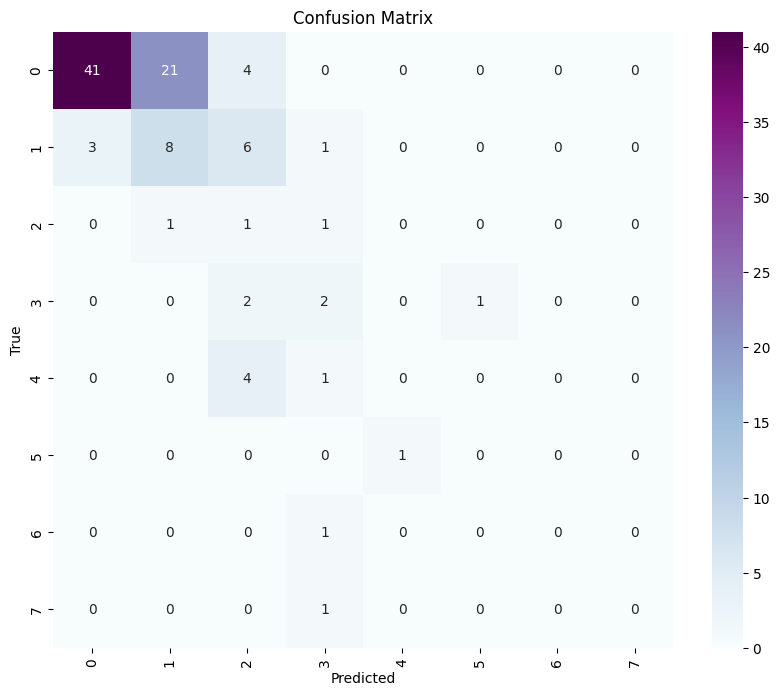

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import confusion_matrix






X_train_sm = sm.add_constant(X_train) 
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())
X_test_sm = sm.add_constant(X_test)
y_pred = np.round(np.abs(model_sm.predict(X_test_sm)), 0)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
cm = confusion_matrix(y_test, y_pred)
print('Total number of errors: ', np.sum(y_test != y_pred),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == y_pred) / len(y_test) * 100)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


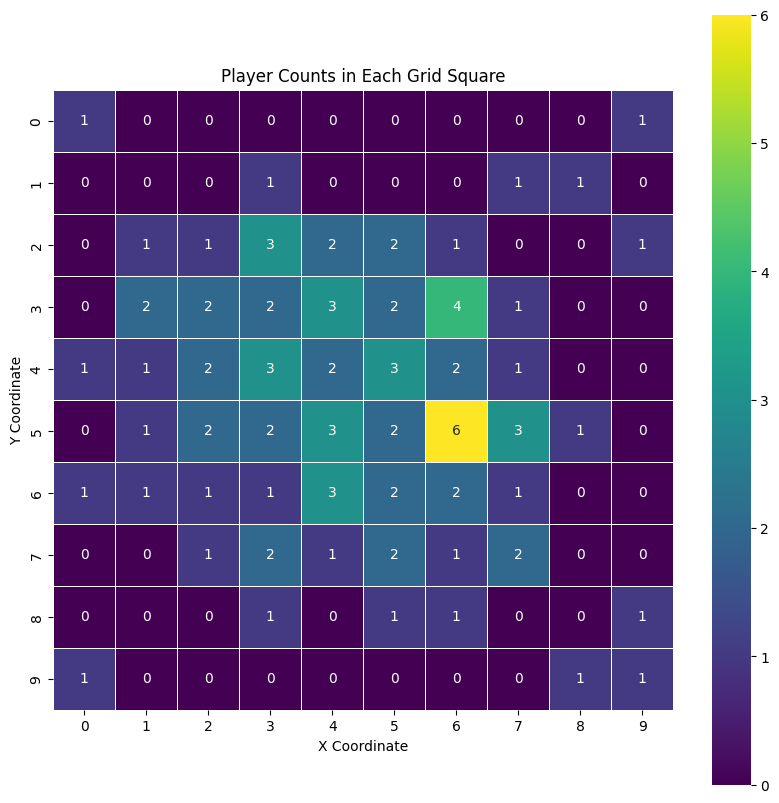

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(y_pred.to_numpy().reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

nEst = np.array([50,100,150,200, 250,300])
mDp = np.array([10,15,20,25,30])

parD = {'n_estimators':nEst, 'max_depth':mDp}


rf = RandomForestClassifier()
gscv = GridSearchCV(rf, param_grid = parD,  n_jobs = 6).fit(X_train,y_train)

print(gscv.best_params_)
print(gscv.score(X_test,y_test))

C:\Users\robuc\anaconda3\envs\pytensorflow\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 25, 'n_estimators': 100}
0.95


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0. 0. 0. 0. 3.
 2. 3. 0. 0. 0. 0. 0. 2. 0. 1. 4. 0. 5. 0. 0. 0. 1. 0. 0. 5. 4. 8. 1. 0.
 0. 1. 0. 0. 2. 3. 2. 1. 4. 3. 1. 0. 0. 1. 1. 0. 4. 1. 3. 0. 0. 0. 1. 0.
 0. 3. 1. 4. 0. 2. 0. 0. 0. 1. 0. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Random Forest MSE: 0.22
Mean Squared Error: 0.22
R-squared: 0.9193430121718726
Total number of errors:  16 in 100
Accuracy:  84.0


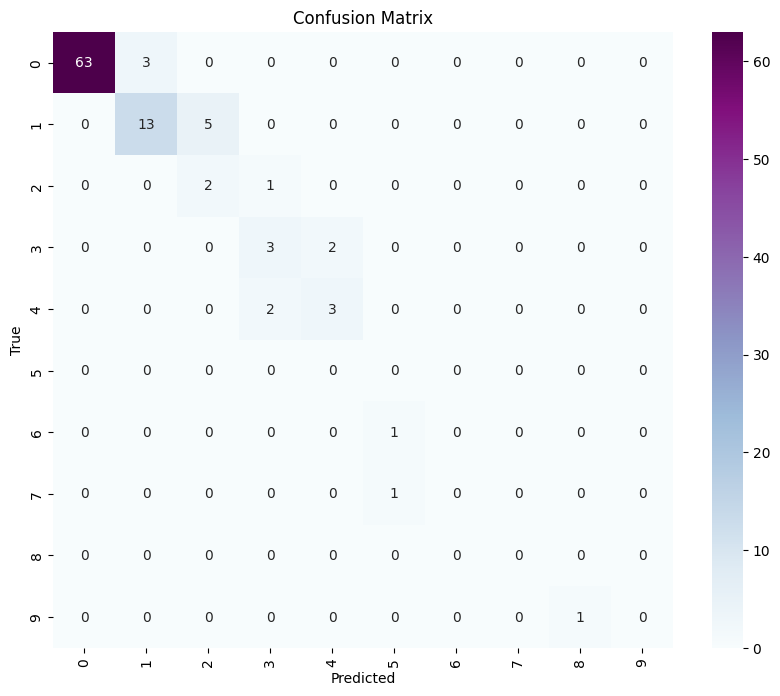

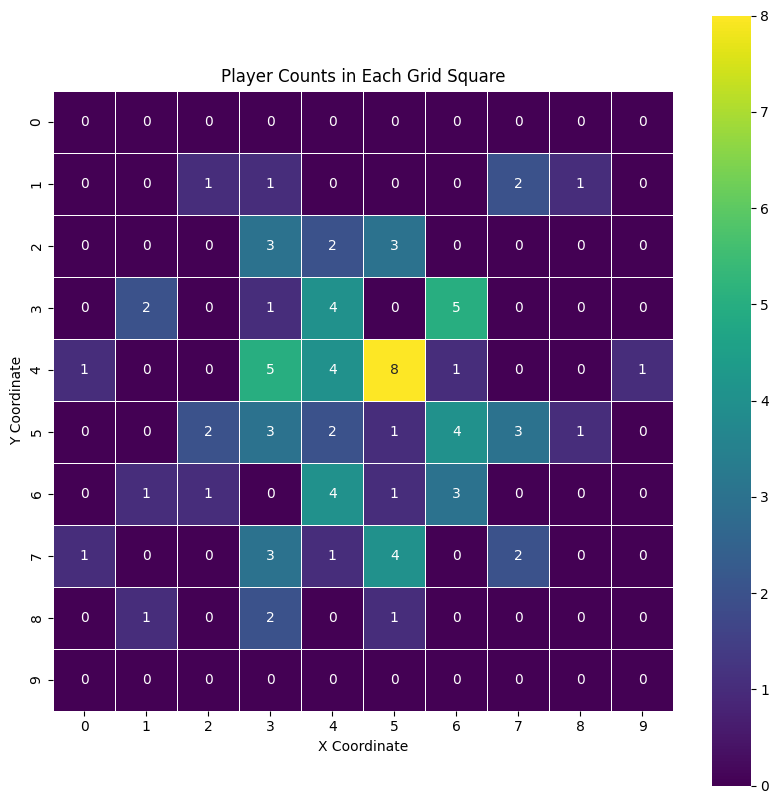

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import confusion_matrix

# Random Forest model
rf_model = RandomForestRegressor(max_depth = 10, n_estimators = 100, n_jobs = 6, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = np.round(np.abs(rf_model.predict(X_test)),0)
print(rf_predictions)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)
r2 = r2_score(y_test, rf_predictions)

print("Mean Squared Error:", rf_mse)
print("R-squared:", r2)


cm = confusion_matrix(y_test, rf_predictions)

print('Total number of errors: ', np.sum(y_test != rf_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == rf_predictions) / len(y_test) * 100)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(rf_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

Accuracy:  61.0


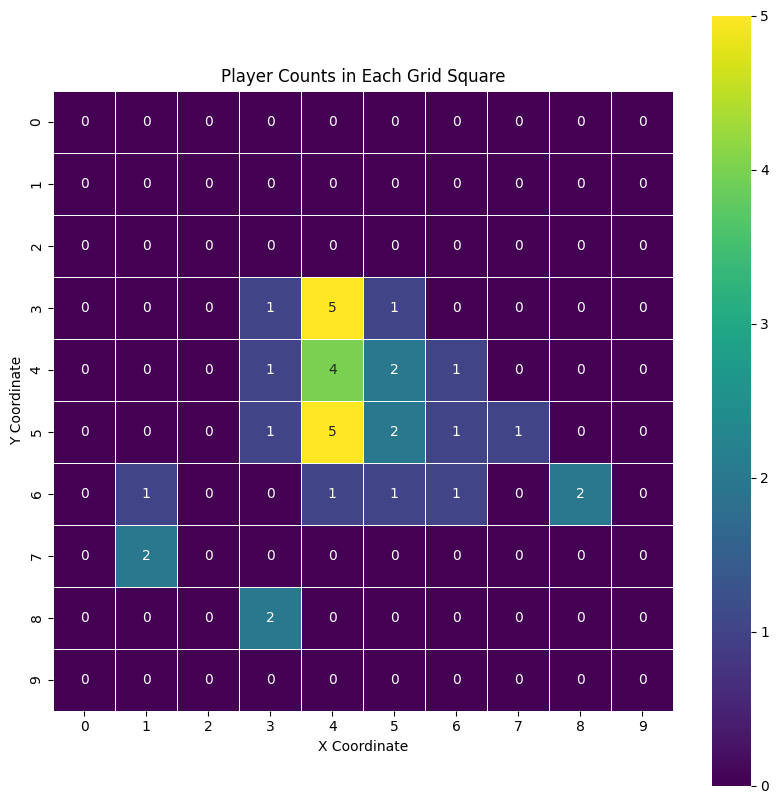

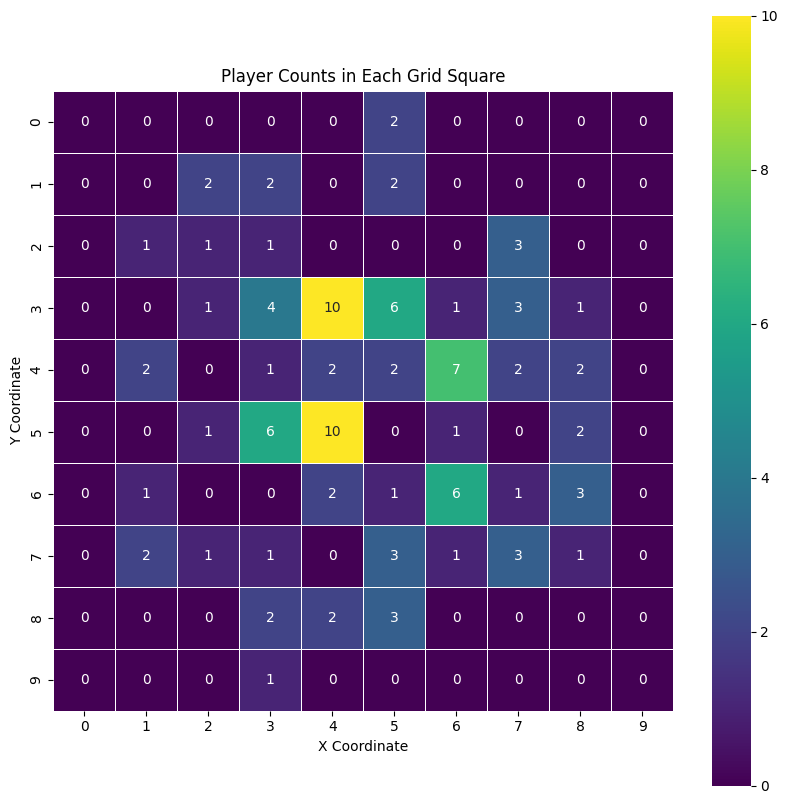

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Random Forest model
rf_predictions_new_map = np.round(np.abs(rf_model.predict(X_test_new_map)),0)


# Evaluate the model
rf_mse = mean_squared_error(y_test_new_map, rf_predictions_new_map)

r2 = r2_score(y_test_new_map, rf_predictions_new_map)



cm = confusion_matrix(y_test_new_map, rf_predictions_new_map)

print('Accuracy: ', np.sum(y_test_new_map == rf_predictions_new_map) / len(y_test_new_map) * 100)

plt.figure(figsize=(10, 10))
sns.heatmap(rf_predictions_new_map.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

grid_data = np.zeros((10, 10))
grid_shape = (grid_size, grid_size) 
a = np.array(test_df_new_map['Player_Category'])
plt.figure(figsize=(10, 10))
sns.heatmap(a.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

KNN MSE: 1.01
R-squared: 0.6297111013345065
Total number of errors:  34 in 100
Accuracy:  66.0


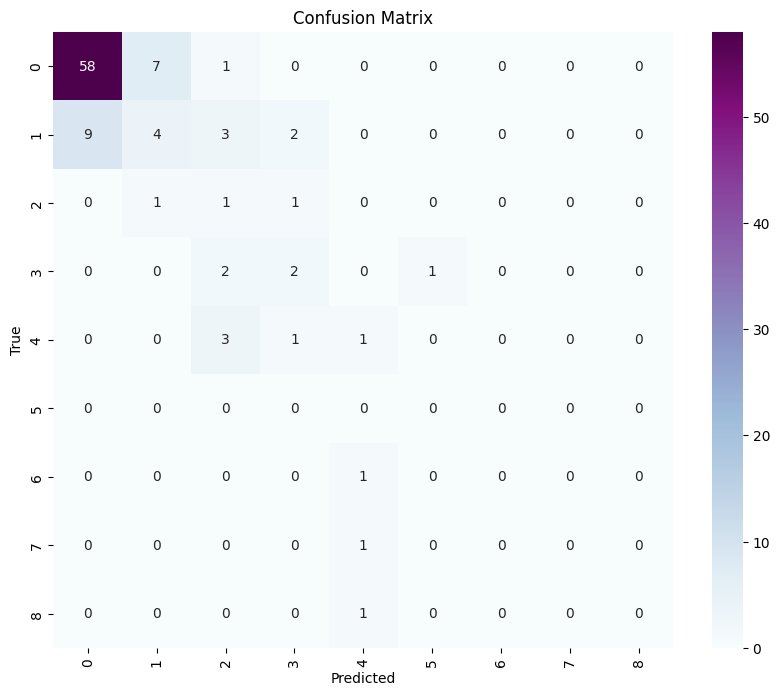

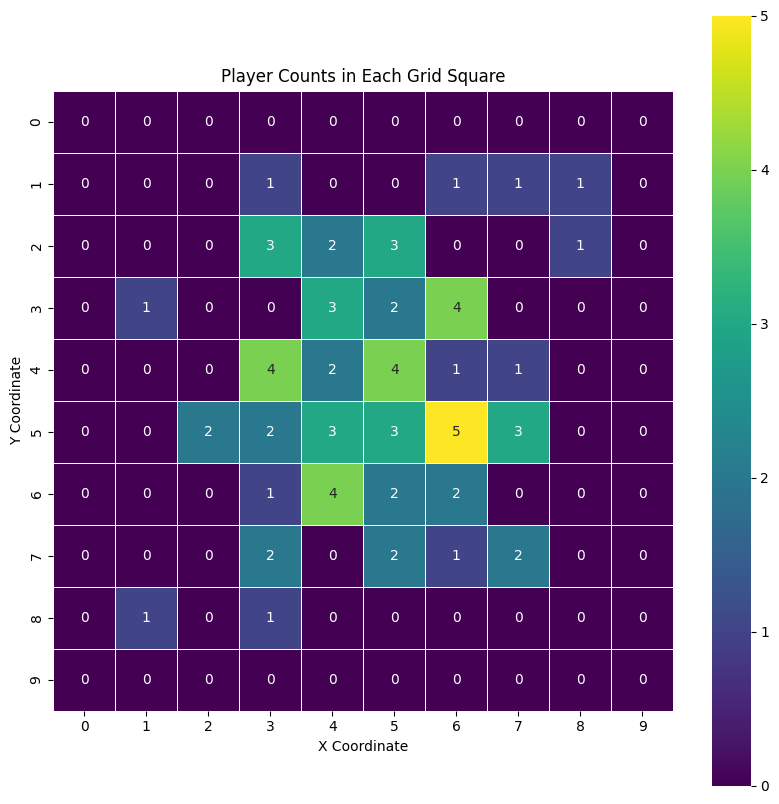

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# KNN model
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train, y_train)
knn_predictions = np.round(np.abs(knn_model.predict(X_test)),0)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
print("KNN MSE:", knn_mse)

r2 = r2_score(y_test, knn_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, knn_predictions)

print('Total number of errors: ', np.sum(y_test != knn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == knn_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 10))
sns.heatmap(knn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


SVM MSE: 1.17
R-squared: 0.5710514738231411
Total number of errors:  26 in 100
Accuracy:  74.0


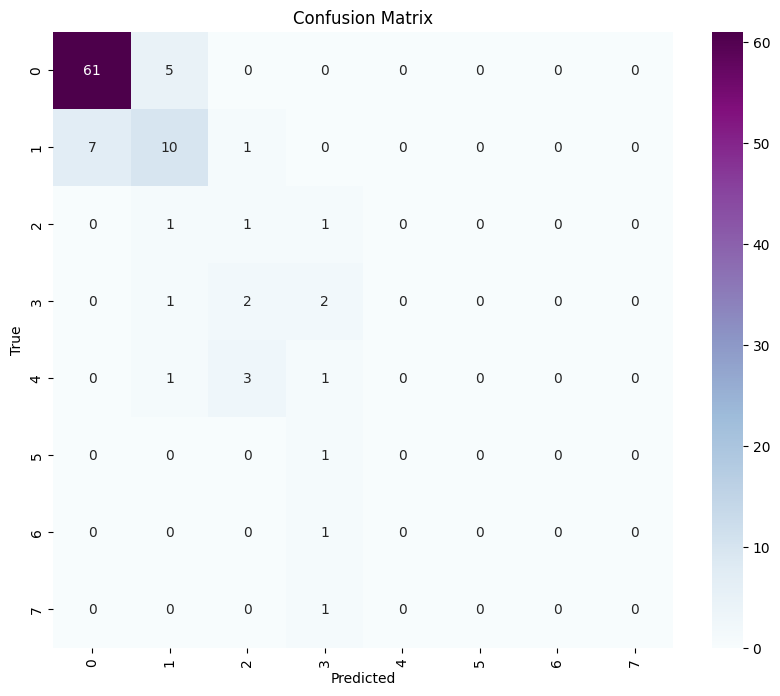

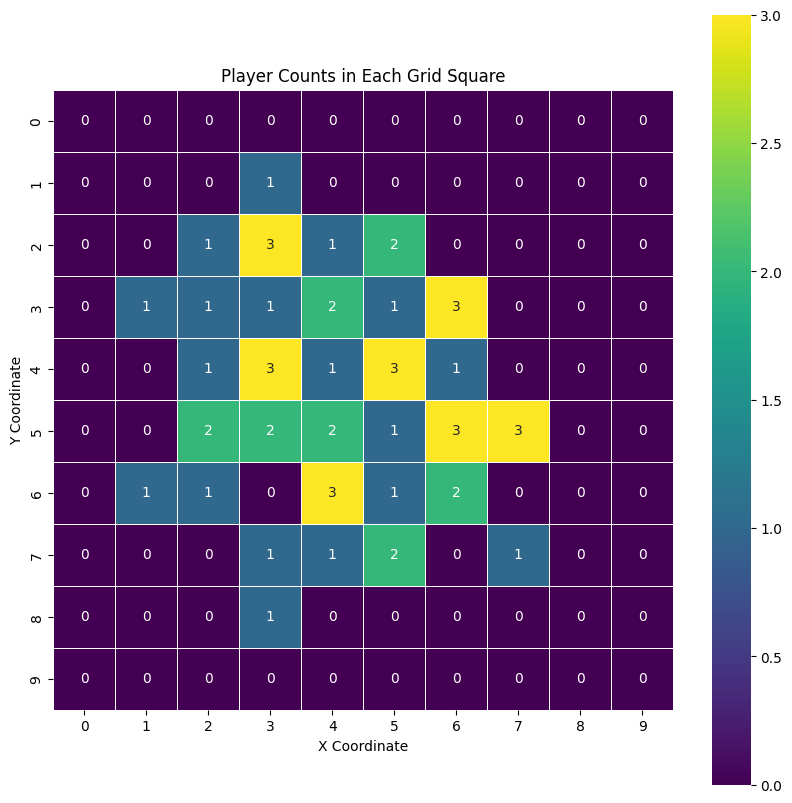

In [32]:
from sklearn.svm import SVR

# SVM model
svm_model = SVR(kernel='rbf')  # 'rbf' is the Radial Basis Function kernel
svm_model.fit(X_train, y_train)
svm_predictions = np.round(np.abs(svm_model.predict(X_test)),0)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_predictions)
print("SVM MSE:", svm_mse)

r2 = r2_score(y_test, svm_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, svm_predictions)

print('Total number of errors: ', np.sum(y_test != svm_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == svm_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(10, 10))
sns.heatmap(svm_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


# Comparassion best model with test

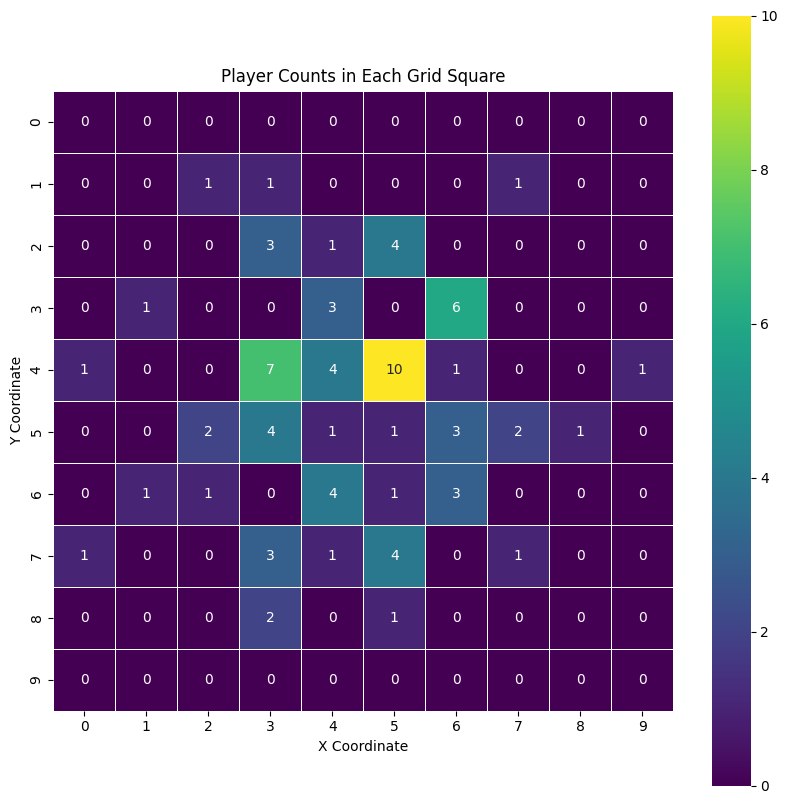

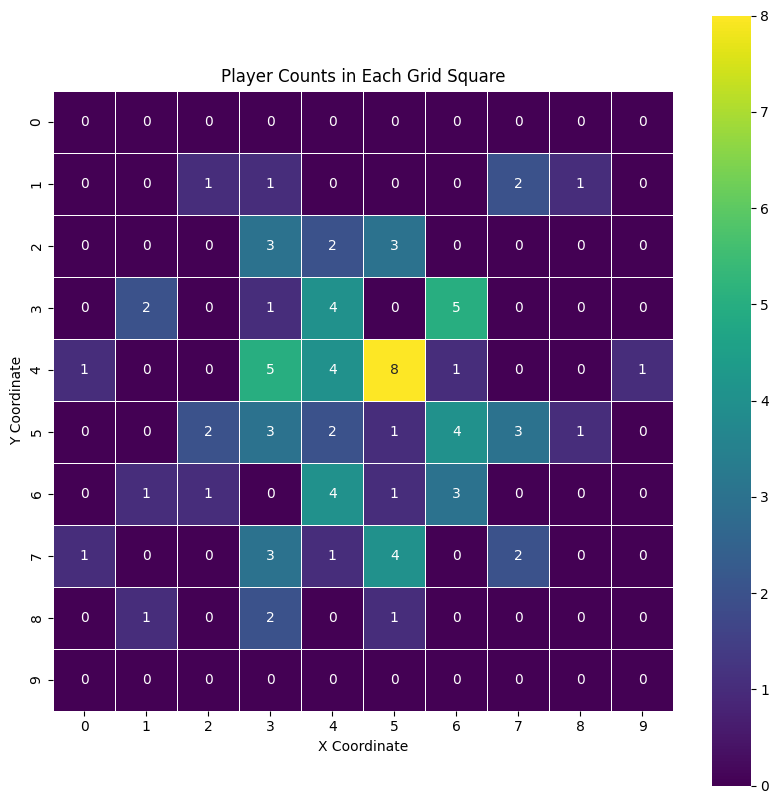

In [36]:
grid_data = np.zeros((10, 10))
grid_shape = (grid_size, grid_size) 
a = np.array(test_df['Player_Category'])
plt.figure(figsize=(10, 10))
sns.heatmap(a.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()





plt.figure(figsize=(10, 10))
sns.heatmap(rf_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network model
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=3, activation='relu'))  # 100 neurons in the hidden layer
nn_model.add(Dense(10, input_dim=3, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dense(1, activation='linear'))  # Output layer
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=200, batch_size=10)




Epoch 1/200
10/10 [==============================] - 0s 11ms/step - loss: 3.4953
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 3.3606
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 3.2522
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 3.1383
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 3.0304
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 2.9138
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 2.8115
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 2.7102
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 2.6055
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 2.4793
Epoch 11/200
10/10 [==============================] - 0s 7ms/step - loss: 2.3903
Epoch 12/200
10/10 [==============================] - 0s 5ms/step - loss: 2.2893
Epoch 13/200
10/10 [==============

4/4 [==============================] - 0s 2ms/step
Neural Network MSE: 0.76
R-squared: 0.7213667693210147
Total number of errors:  33 in 100
Accuracy:  67.0


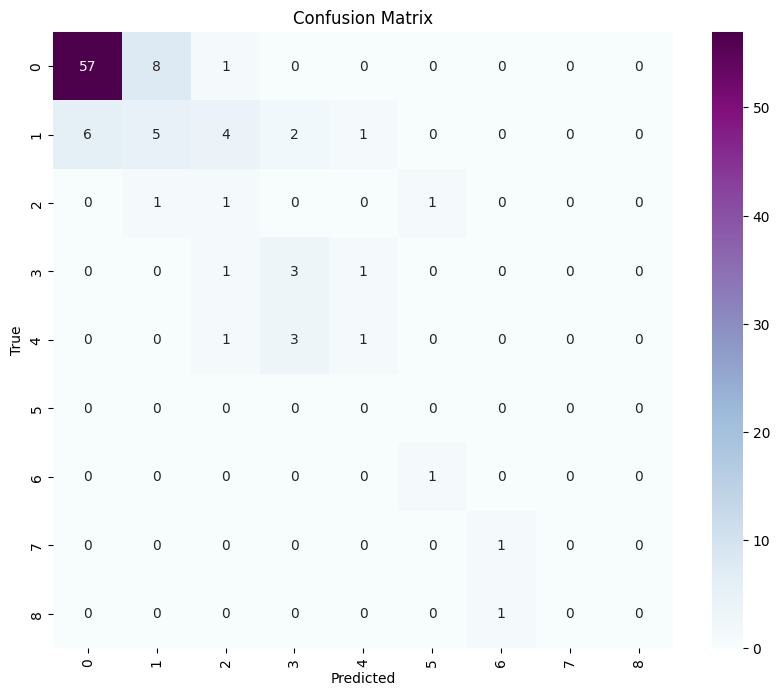

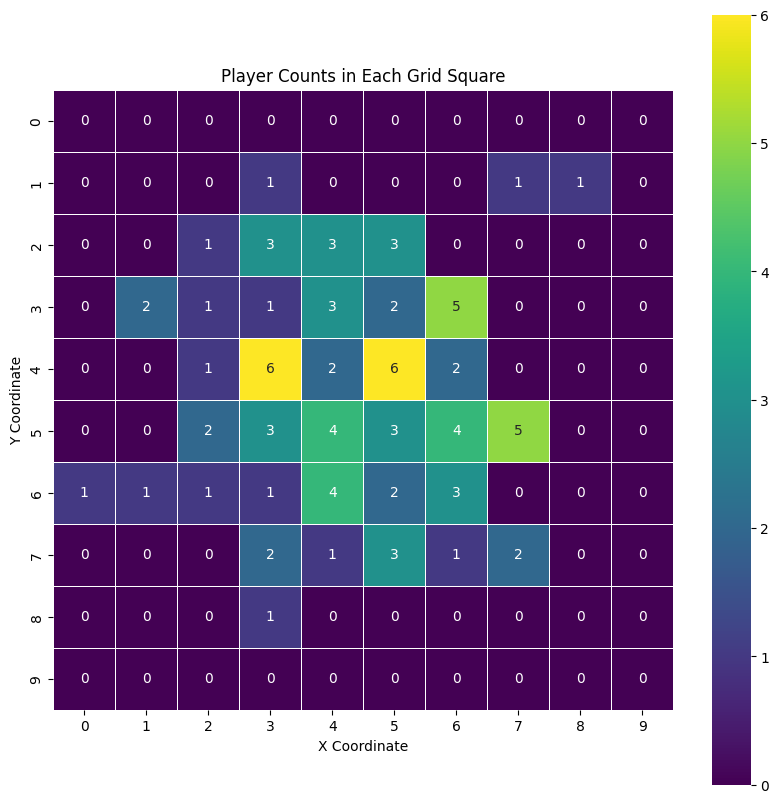

In [88]:
nn_predictions = np.round(np.abs(nn_model.predict(X_test)),0).flatten()
# Evaluate the model
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)


r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, nn_predictions)

print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nn_model = Sequential()
nn_model.add(Dense(2000, input_dim=3, activation='relu'))  # 100 neurons in the hidden layer
nn_model.add(Dropout(0.6))
nn_model.add(Dense(1000, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dropout(0.6))  # 10 neurons in the hidden layer
nn_model.add(Dense(500, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dropout(0.6))  # 10 neurons in the hidden layer
nn_model.add(Dense(100, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dropout(0.6))  # 10 neurons in the hidden layer
nn_model.add(Dense(10, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dense(1, activation='linear'))  # Output layer

nn_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])





In [101]:
history = nn_model.fit(X_train, y_train, epochs=2000, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/2000
100/100 [==============================] - 2s 15ms/step - loss: 3.3993 - accuracy: 0.4700 - val_loss: 3.2669 - val_accuracy: 0.6600
Epoch 2/2000
100/100 [==============================] - 1s 11ms/step - loss: 3.1450 - accuracy: 0.5300 - val_loss: 3.0024 - val_accuracy: 0.6600
Epoch 3/2000
100/100 [==============================] - 1s 12ms/step - loss: 2.5194 - accuracy: 0.5500 - val_loss: 3.2785 - val_accuracy: 0.6600
Epoch 4/2000
100/100 [==============================] - 1s 12ms/step - loss: 2.8878 - accuracy: 0.5400 - val_loss: 2.2676 - val_accuracy: 0.6900
Epoch 5/2000
100/100 [==============================] - 1s 13ms/step - loss: 2.6806 - accuracy: 0.6300 - val_loss: 2.2432 - val_accuracy: 0.7000
Epoch 6/2000
100/100 [==============================] - 1s 15ms/step - loss: 2.2860 - accuracy: 0.5600 - val_loss: 1.8738 - val_accuracy: 0.7000
Epoch 7/2000
100/100 [==============================] - 1s 12ms/step - loss: 2.0289 - accuracy: 0.5800 - val_loss: 2.5419 - val_ac

100/100 [==============================] - 1s 13ms/step - loss: 1.4544 - accuracy: 0.6400 - val_loss: 0.9442 - val_accuracy: 0.6700
Epoch 114/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.7461 - accuracy: 0.6500 - val_loss: 0.9853 - val_accuracy: 0.6500
Epoch 115/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.9208 - accuracy: 0.6500 - val_loss: 1.4293 - val_accuracy: 0.6800
Epoch 116/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.6454 - accuracy: 0.6500 - val_loss: 1.1043 - val_accuracy: 0.6900
Epoch 117/2000
100/100 [==============================] - 1s 14ms/step - loss: 1.4547 - accuracy: 0.5800 - val_loss: 0.9047 - val_accuracy: 0.7100
Epoch 118/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.2254 - accuracy: 0.6300 - val_loss: 0.9782 - val_accuracy: 0.6700
Epoch 119/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.7147 - accuracy: 0.6600 - val_loss: 1.1166 - val_acc

Epoch 169/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.3294 - accuracy: 0.4900 - val_loss: 1.0793 - val_accuracy: 0.5300
Epoch 170/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.3446 - accuracy: 0.6600 - val_loss: 0.7079 - val_accuracy: 0.5700
Epoch 171/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.2360 - accuracy: 0.6100 - val_loss: 0.9122 - val_accuracy: 0.5100
Epoch 172/2000
100/100 [==============================] - 2s 16ms/step - loss: 1.6293 - accuracy: 0.6300 - val_loss: 1.3506 - val_accuracy: 0.6500
Epoch 173/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.6290 - accuracy: 0.6200 - val_loss: 1.0238 - val_accuracy: 0.6700
Epoch 174/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.1315 - accuracy: 0.6200 - val_loss: 0.8105 - val_accuracy: 0.6600
Epoch 175/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9323 - accuracy: 0.5900 - val_loss: 0

Epoch 225/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.1239 - accuracy: 0.6300 - val_loss: 0.5003 - val_accuracy: 0.7000
Epoch 226/2000
100/100 [==============================] - 2s 16ms/step - loss: 0.8802 - accuracy: 0.6100 - val_loss: 0.5047 - val_accuracy: 0.7100
Epoch 227/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.7990 - accuracy: 0.6500 - val_loss: 0.4710 - val_accuracy: 0.6100
Epoch 228/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.1285 - accuracy: 0.5800 - val_loss: 0.4122 - val_accuracy: 0.6900
Epoch 229/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8454 - accuracy: 0.6300 - val_loss: 0.5883 - val_accuracy: 0.6800
Epoch 230/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.4125 - accuracy: 0.6400 - val_loss: 0.8297 - val_accuracy: 0.7000
Epoch 231/2000
100/100 [==============================] - 2s 15ms/step - loss: 1.2831 - accuracy: 0.6300 - val_loss: 0

Epoch 281/2000
100/100 [==============================] - 1s 14ms/step - loss: 1.1143 - accuracy: 0.5700 - val_loss: 0.7448 - val_accuracy: 0.6900
Epoch 282/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.1374 - accuracy: 0.6500 - val_loss: 0.7660 - val_accuracy: 0.7000
Epoch 283/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.1293 - accuracy: 0.6300 - val_loss: 0.6765 - val_accuracy: 0.6900
Epoch 284/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.0885 - accuracy: 0.6800 - val_loss: 0.6151 - val_accuracy: 0.7000
Epoch 285/2000
100/100 [==============================] - 1s 15ms/step - loss: 0.8170 - accuracy: 0.6200 - val_loss: 0.5380 - val_accuracy: 0.6900
Epoch 286/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.1801 - accuracy: 0.6000 - val_loss: 0.3942 - val_accuracy: 0.7000
Epoch 287/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.1367 - accuracy: 0.6100 - val_loss: 0

Epoch 337/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6970 - accuracy: 0.6900 - val_loss: 0.4554 - val_accuracy: 0.6900
Epoch 338/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.6945 - accuracy: 0.6900 - val_loss: 0.3334 - val_accuracy: 0.6900
Epoch 339/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.5984 - accuracy: 0.7000 - val_loss: 0.3133 - val_accuracy: 0.6900
Epoch 340/2000
100/100 [==============================] - 1s 15ms/step - loss: 1.1322 - accuracy: 0.6600 - val_loss: 0.4088 - val_accuracy: 0.7000
Epoch 341/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7856 - accuracy: 0.5700 - val_loss: 0.5387 - val_accuracy: 0.6700
Epoch 342/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.0293 - accuracy: 0.5900 - val_loss: 0.8699 - val_accuracy: 0.6700
Epoch 343/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.0233 - accuracy: 0.6700 - val_loss: 0

Epoch 393/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.9039 - accuracy: 0.5900 - val_loss: 0.4080 - val_accuracy: 0.6700
Epoch 394/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.9466 - accuracy: 0.6400 - val_loss: 0.4554 - val_accuracy: 0.5500
Epoch 395/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9513 - accuracy: 0.5700 - val_loss: 0.3918 - val_accuracy: 0.6500
Epoch 396/2000
100/100 [==============================] - 1s 15ms/step - loss: 0.8504 - accuracy: 0.6000 - val_loss: 0.5867 - val_accuracy: 0.6900
Epoch 397/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9200 - accuracy: 0.6100 - val_loss: 0.3762 - val_accuracy: 0.7100
Epoch 398/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.7383 - accuracy: 0.6600 - val_loss: 0.4402 - val_accuracy: 0.7000
Epoch 399/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8586 - accuracy: 0.6600 - val_loss: 0

Epoch 449/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9070 - accuracy: 0.6600 - val_loss: 0.3340 - val_accuracy: 0.7000
Epoch 450/2000
100/100 [==============================] - 2s 15ms/step - loss: 1.0204 - accuracy: 0.6500 - val_loss: 0.3245 - val_accuracy: 0.7000
Epoch 451/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.8726 - accuracy: 0.6900 - val_loss: 0.3585 - val_accuracy: 0.7000
Epoch 452/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6882 - accuracy: 0.6300 - val_loss: 0.3121 - val_accuracy: 0.7000
Epoch 453/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6917 - accuracy: 0.6800 - val_loss: 0.5475 - val_accuracy: 0.7100
Epoch 454/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6788 - accuracy: 0.6500 - val_loss: 0.4181 - val_accuracy: 0.6700
Epoch 455/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.8646 - accuracy: 0.6200 - val_loss: 0

Epoch 505/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.9709 - accuracy: 0.6700 - val_loss: 1.0964 - val_accuracy: 0.6900
Epoch 506/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.0871 - accuracy: 0.6300 - val_loss: 0.4248 - val_accuracy: 0.7100
Epoch 507/2000
100/100 [==============================] - 1s 15ms/step - loss: 1.2587 - accuracy: 0.6300 - val_loss: 0.6521 - val_accuracy: 0.7000
Epoch 508/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.0457 - accuracy: 0.6200 - val_loss: 0.7108 - val_accuracy: 0.6800
Epoch 509/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7648 - accuracy: 0.6600 - val_loss: 0.3036 - val_accuracy: 0.7000
Epoch 510/2000
100/100 [==============================] - 1s 14ms/step - loss: 1.0508 - accuracy: 0.6200 - val_loss: 0.7285 - val_accuracy: 0.7000
Epoch 511/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6381 - accuracy: 0.6100 - val_loss: 0

Epoch 561/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5834 - accuracy: 0.6000 - val_loss: 0.4181 - val_accuracy: 0.6000
Epoch 562/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8824 - accuracy: 0.6700 - val_loss: 0.2651 - val_accuracy: 0.7000
Epoch 563/2000
100/100 [==============================] - 1s 14ms/step - loss: 1.0955 - accuracy: 0.7100 - val_loss: 0.3785 - val_accuracy: 0.6500
Epoch 564/2000
100/100 [==============================] - 1s 15ms/step - loss: 1.2506 - accuracy: 0.6900 - val_loss: 0.7245 - val_accuracy: 0.7000
Epoch 565/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9689 - accuracy: 0.6800 - val_loss: 0.6675 - val_accuracy: 0.6700
Epoch 566/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8714 - accuracy: 0.6400 - val_loss: 0.4247 - val_accuracy: 0.6700
Epoch 567/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.1711 - accuracy: 0.5900 - val_loss: 0

Epoch 617/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8871 - accuracy: 0.6000 - val_loss: 0.4404 - val_accuracy: 0.6300
Epoch 618/2000
100/100 [==============================] - 2s 15ms/step - loss: 0.7945 - accuracy: 0.6400 - val_loss: 0.2723 - val_accuracy: 0.7000
Epoch 619/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.5932 - accuracy: 0.6700 - val_loss: 0.3679 - val_accuracy: 0.6900
Epoch 620/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.6469 - accuracy: 0.6500 - val_loss: 0.4300 - val_accuracy: 0.7000
Epoch 621/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.1402 - accuracy: 0.7000 - val_loss: 0.9230 - val_accuracy: 0.6900
Epoch 622/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.8948 - accuracy: 0.6700 - val_loss: 0.3532 - val_accuracy: 0.7100
Epoch 623/2000
100/100 [==============================] - 2s 16ms/step - loss: 0.6496 - accuracy: 0.6400 - val_loss: 0

Epoch 673/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.2826 - accuracy: 0.5700 - val_loss: 0.4468 - val_accuracy: 0.7000
Epoch 674/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.9998 - accuracy: 0.6700 - val_loss: 0.5558 - val_accuracy: 0.6800
Epoch 675/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.4147 - accuracy: 0.6900 - val_loss: 0.3636 - val_accuracy: 0.7100
Epoch 676/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.9083 - accuracy: 0.6900 - val_loss: 0.4766 - val_accuracy: 0.6800
Epoch 677/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.8509 - accuracy: 0.6500 - val_loss: 0.4541 - val_accuracy: 0.7000
Epoch 678/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.7208 - accuracy: 0.6200 - val_loss: 0.4274 - val_accuracy: 0.5200
Epoch 679/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8614 - accuracy: 0.6600 - val_loss: 0

Epoch 729/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6511 - accuracy: 0.6900 - val_loss: 0.3382 - val_accuracy: 0.7000
Epoch 730/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6064 - accuracy: 0.7000 - val_loss: 0.3229 - val_accuracy: 0.5000
Epoch 731/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8628 - accuracy: 0.6200 - val_loss: 0.2698 - val_accuracy: 0.6900
Epoch 732/2000
100/100 [==============================] - 1s 15ms/step - loss: 0.9736 - accuracy: 0.6100 - val_loss: 0.6380 - val_accuracy: 0.6600
Epoch 733/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.4495 - accuracy: 0.6900 - val_loss: 0.4442 - val_accuracy: 0.7000
Epoch 734/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.8800 - accuracy: 0.6700 - val_loss: 0.3290 - val_accuracy: 0.6900
Epoch 735/2000
100/100 [==============================] - 2s 15ms/step - loss: 0.7498 - accuracy: 0.6700 - val_loss: 0

Epoch 785/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6592 - accuracy: 0.6800 - val_loss: 0.4000 - val_accuracy: 0.7100
Epoch 786/2000
100/100 [==============================] - 1s 13ms/step - loss: 1.0794 - accuracy: 0.6800 - val_loss: 0.4686 - val_accuracy: 0.7200
Epoch 787/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5914 - accuracy: 0.7100 - val_loss: 0.4639 - val_accuracy: 0.7200
Epoch 788/2000
100/100 [==============================] - 1s 14ms/step - loss: 1.4278 - accuracy: 0.6600 - val_loss: 0.6894 - val_accuracy: 0.7200
Epoch 789/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.3232 - accuracy: 0.6500 - val_loss: 0.5281 - val_accuracy: 0.7300
Epoch 790/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.6300 - val_loss: 0.3033 - val_accuracy: 0.7000
Epoch 791/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9453 - accuracy: 0.6900 - val_loss: 0

Epoch 841/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.4842 - accuracy: 0.6900 - val_loss: 0.6553 - val_accuracy: 0.7300
Epoch 842/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6629 - accuracy: 0.7100 - val_loss: 0.4454 - val_accuracy: 0.7200
Epoch 843/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9455 - accuracy: 0.6800 - val_loss: 0.3736 - val_accuracy: 0.7200
Epoch 844/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.8041 - accuracy: 0.7100 - val_loss: 0.3204 - val_accuracy: 0.7100
Epoch 845/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.5558 - accuracy: 0.6700 - val_loss: 0.4025 - val_accuracy: 0.7100
Epoch 846/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7770 - accuracy: 0.6700 - val_loss: 0.5083 - val_accuracy: 0.7200
Epoch 847/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7753 - accuracy: 0.7000 - val_loss: 0

Epoch 897/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8902 - accuracy: 0.7000 - val_loss: 0.6463 - val_accuracy: 0.7100
Epoch 898/2000
100/100 [==============================] - 1s 15ms/step - loss: 0.8824 - accuracy: 0.7100 - val_loss: 0.7868 - val_accuracy: 0.7100
Epoch 899/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8056 - accuracy: 0.6700 - val_loss: 0.3220 - val_accuracy: 0.7400
Epoch 900/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.8648 - accuracy: 0.7000 - val_loss: 0.2970 - val_accuracy: 0.7300
Epoch 901/2000
100/100 [==============================] - 2s 15ms/step - loss: 0.5196 - accuracy: 0.7000 - val_loss: 0.2915 - val_accuracy: 0.7200
Epoch 902/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6961 - accuracy: 0.7100 - val_loss: 0.2642 - val_accuracy: 0.7300
Epoch 903/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.9039 - accuracy: 0.6800 - val_loss: 0

Epoch 953/2000
100/100 [==============================] - 2s 15ms/step - loss: 0.6356 - accuracy: 0.6800 - val_loss: 0.2425 - val_accuracy: 0.7300
Epoch 954/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.9069 - accuracy: 0.7000 - val_loss: 0.6162 - val_accuracy: 0.7200
Epoch 955/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.7819 - accuracy: 0.6900 - val_loss: 0.2717 - val_accuracy: 0.7200
Epoch 956/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6391 - accuracy: 0.7000 - val_loss: 0.3909 - val_accuracy: 0.7200
Epoch 957/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5561 - accuracy: 0.6900 - val_loss: 0.4688 - val_accuracy: 0.7300
Epoch 958/2000
100/100 [==============================] - 1s 14ms/step - loss: 1.1957 - accuracy: 0.6700 - val_loss: 0.6442 - val_accuracy: 0.7300
Epoch 959/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.7544 - accuracy: 0.6800 - val_loss: 0

100/100 [==============================] - 2s 15ms/step - loss: 0.5775 - accuracy: 0.6800 - val_loss: 0.4045 - val_accuracy: 0.7400
Epoch 1064/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.4989 - accuracy: 0.6900 - val_loss: 0.3482 - val_accuracy: 0.7400
Epoch 1065/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.6767 - accuracy: 0.6900 - val_loss: 0.5472 - val_accuracy: 0.7200
Epoch 1066/2000
100/100 [==============================] - 2s 15ms/step - loss: 0.8184 - accuracy: 0.6800 - val_loss: 0.2781 - val_accuracy: 0.7200
Epoch 1067/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.9452 - accuracy: 0.7100 - val_loss: 0.6733 - val_accuracy: 0.7400
Epoch 1068/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.8471 - accuracy: 0.7100 - val_loss: 0.3483 - val_accuracy: 0.7200
Epoch 1069/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7733 - accuracy: 0.6700 - val_loss: 0.6812 - v

100/100 [==============================] - 2s 15ms/step - loss: 0.8513 - accuracy: 0.7000 - val_loss: 0.2627 - val_accuracy: 0.7300
Epoch 1174/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.8665 - accuracy: 0.7100 - val_loss: 0.2740 - val_accuracy: 0.7300
Epoch 1175/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8252 - accuracy: 0.7100 - val_loss: 0.3023 - val_accuracy: 0.6900
Epoch 1176/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.7556 - accuracy: 0.6800 - val_loss: 0.2643 - val_accuracy: 0.7300
Epoch 1177/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7021 - accuracy: 0.6800 - val_loss: 0.2982 - val_accuracy: 0.7300
Epoch 1178/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7234 - accuracy: 0.6700 - val_loss: 0.3760 - val_accuracy: 0.7300
Epoch 1179/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5535 - accuracy: 0.6600 - val_loss: 0.2781 - v

100/100 [==============================] - 2s 15ms/step - loss: 0.7600 - accuracy: 0.6800 - val_loss: 0.6073 - val_accuracy: 0.7200
Epoch 1284/2000
100/100 [==============================] - 2s 15ms/step - loss: 0.9901 - accuracy: 0.6400 - val_loss: 0.4263 - val_accuracy: 0.7200
Epoch 1285/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7416 - accuracy: 0.6800 - val_loss: 0.3372 - val_accuracy: 0.7200
Epoch 1286/2000
100/100 [==============================] - 2s 16ms/step - loss: 0.6155 - accuracy: 0.6800 - val_loss: 0.3234 - val_accuracy: 0.7300
Epoch 1287/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.4385 - accuracy: 0.6800 - val_loss: 0.2454 - val_accuracy: 0.7200
Epoch 1288/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5134 - accuracy: 0.7000 - val_loss: 0.5466 - val_accuracy: 0.7300
Epoch 1289/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6225 - accuracy: 0.6900 - val_loss: 0.3364 - v

100/100 [==============================] - 1s 14ms/step - loss: 0.6504 - accuracy: 0.6700 - val_loss: 0.8380 - val_accuracy: 0.7300
Epoch 1394/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.7500 - accuracy: 0.6600 - val_loss: 0.3951 - val_accuracy: 0.7200
Epoch 1395/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.5891 - accuracy: 0.6800 - val_loss: 0.2643 - val_accuracy: 0.7300
Epoch 1396/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6877 - accuracy: 0.6800 - val_loss: 0.3014 - val_accuracy: 0.7300
Epoch 1397/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.9336 - accuracy: 0.6800 - val_loss: 0.5443 - val_accuracy: 0.7000
Epoch 1398/2000
100/100 [==============================] - 1s 15ms/step - loss: 0.6424 - accuracy: 0.6600 - val_loss: 0.2785 - val_accuracy: 0.7200
Epoch 1399/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.4785 - accuracy: 0.7100 - val_loss: 0.2962 - v

100/100 [==============================] - 1s 13ms/step - loss: 0.6068 - accuracy: 0.7100 - val_loss: 0.2551 - val_accuracy: 0.7200
Epoch 1504/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7470 - accuracy: 0.6600 - val_loss: 0.2804 - val_accuracy: 0.7200
Epoch 1505/2000
100/100 [==============================] - 1s 15ms/step - loss: 0.5582 - accuracy: 0.6900 - val_loss: 0.4259 - val_accuracy: 0.7300
Epoch 1506/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.8806 - accuracy: 0.6900 - val_loss: 0.3392 - val_accuracy: 0.6800
Epoch 1507/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6945 - accuracy: 0.6700 - val_loss: 0.3183 - val_accuracy: 0.7200
Epoch 1508/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.5774 - accuracy: 0.6800 - val_loss: 0.2721 - val_accuracy: 0.7200
Epoch 1509/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.7016 - accuracy: 0.7000 - val_loss: 0.2713 - v

100/100 [==============================] - 1s 12ms/step - loss: 1.0109 - accuracy: 0.6600 - val_loss: 0.5018 - val_accuracy: 0.7300
Epoch 1614/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7301 - accuracy: 0.6500 - val_loss: 0.5405 - val_accuracy: 0.7300
Epoch 1615/2000
100/100 [==============================] - 2s 16ms/step - loss: 1.1054 - accuracy: 0.6600 - val_loss: 0.3213 - val_accuracy: 0.7200
Epoch 1616/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.4722 - accuracy: 0.6600 - val_loss: 0.2437 - val_accuracy: 0.7300
Epoch 1617/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.7000 - val_loss: 0.3943 - val_accuracy: 0.7300
Epoch 1618/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.4123 - accuracy: 0.7200 - val_loss: 0.4958 - val_accuracy: 0.7300
Epoch 1619/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6370 - accuracy: 0.6500 - val_loss: 0.4234 - v

100/100 [==============================] - 1s 12ms/step - loss: 0.6465 - accuracy: 0.6600 - val_loss: 0.3862 - val_accuracy: 0.7200
Epoch 1724/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6594 - accuracy: 0.7000 - val_loss: 0.2940 - val_accuracy: 0.7300
Epoch 1725/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5383 - accuracy: 0.7000 - val_loss: 0.3881 - val_accuracy: 0.7200
Epoch 1726/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5470 - accuracy: 0.6700 - val_loss: 0.2743 - val_accuracy: 0.7200
Epoch 1727/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5774 - accuracy: 0.7100 - val_loss: 0.4151 - val_accuracy: 0.7300
Epoch 1728/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.7618 - accuracy: 0.6600 - val_loss: 0.3165 - val_accuracy: 0.7400
Epoch 1729/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.5472 - accuracy: 0.7000 - val_loss: 0.3175 - v

100/100 [==============================] - 2s 15ms/step - loss: 0.9132 - accuracy: 0.7200 - val_loss: 0.2961 - val_accuracy: 0.7400
Epoch 1834/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.6591 - accuracy: 0.7000 - val_loss: 0.2743 - val_accuracy: 0.7400
Epoch 1835/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.8605 - accuracy: 0.6500 - val_loss: 0.4355 - val_accuracy: 0.7300
Epoch 1836/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.6215 - accuracy: 0.6900 - val_loss: 0.6203 - val_accuracy: 0.7300
Epoch 1837/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.6430 - accuracy: 0.6800 - val_loss: 0.2923 - val_accuracy: 0.7400
Epoch 1838/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.9840 - accuracy: 0.6900 - val_loss: 0.3477 - val_accuracy: 0.7200
Epoch 1839/2000
100/100 [==============================] - 1s 13ms/step - loss: 0.6912 - accuracy: 0.6400 - val_loss: 0.3308 - v

100/100 [==============================] - 1s 12ms/step - loss: 0.9121 - accuracy: 0.7200 - val_loss: 0.3100 - val_accuracy: 0.7200
Epoch 1944/2000
100/100 [==============================] - 1s 15ms/step - loss: 0.7233 - accuracy: 0.6900 - val_loss: 0.2998 - val_accuracy: 0.7200
Epoch 1945/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.9423 - accuracy: 0.6500 - val_loss: 0.3142 - val_accuracy: 0.7200
Epoch 1946/2000
100/100 [==============================] - 1s 12ms/step - loss: 0.8440 - accuracy: 0.6600 - val_loss: 0.2617 - val_accuracy: 0.7300
Epoch 1947/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.0276 - accuracy: 0.6700 - val_loss: 0.5666 - val_accuracy: 0.7300
Epoch 1948/2000
100/100 [==============================] - 1s 12ms/step - loss: 1.0119 - accuracy: 0.6900 - val_loss: 0.3033 - val_accuracy: 0.7000
Epoch 1949/2000
100/100 [==============================] - 1s 14ms/step - loss: 0.7148 - accuracy: 0.7000 - val_loss: 0.3794 - v

In [ ]:
nn_model.save('nn_model.h5')

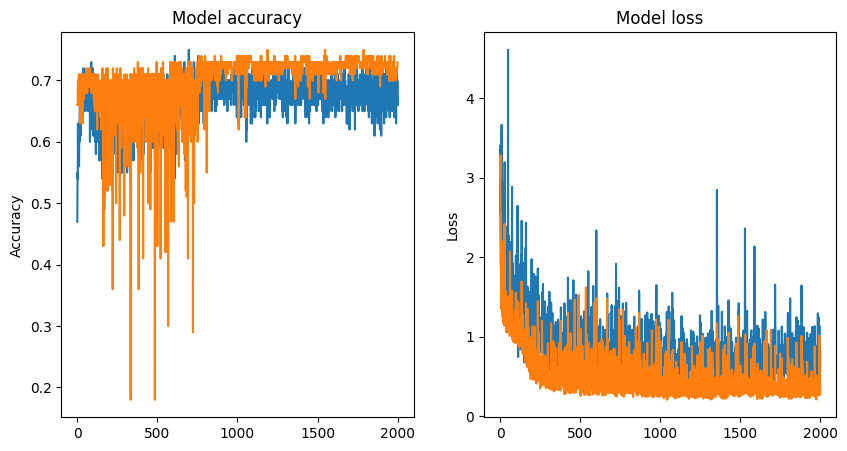

In [103]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()


4/4 [==============================] - 0s 6ms/step
Neural Network MSE: 0.38
R-squared: 0.8606833846605073
Total number of errors:  24 in 100
Accuracy:  76.0


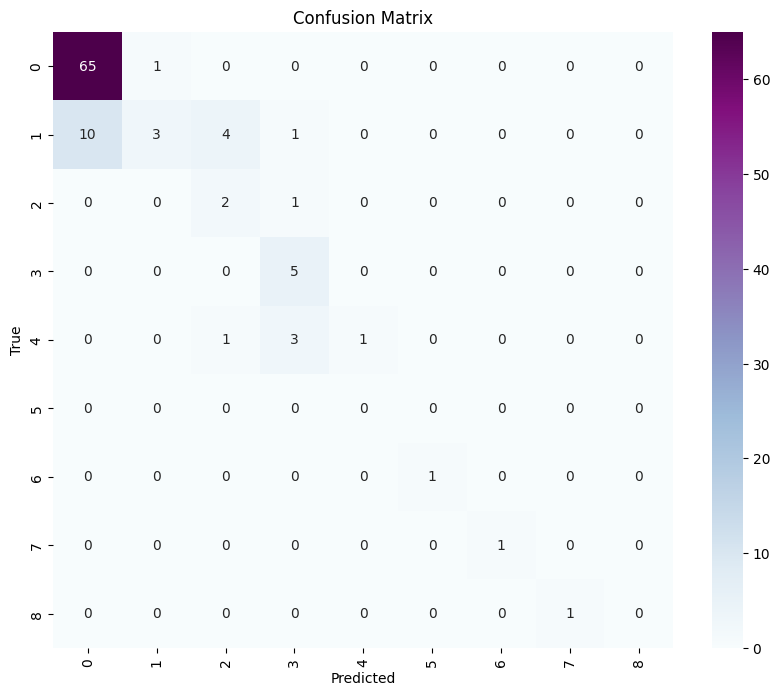

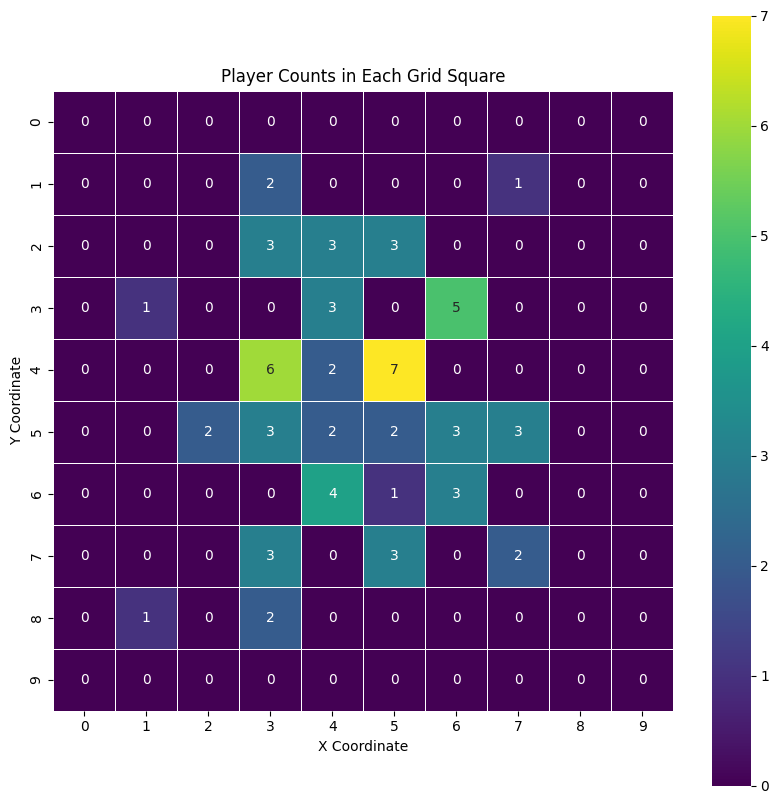

In [104]:
nn_predictions = np.round(np.abs(nn_model.predict(X_test)),0).flatten()
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)
r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)
cm = confusion_matrix(y_test, nn_predictions)
print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [32]:
import tensorflow.keras as keras
nn_model = keras.models.load_model('nn_model_dropout.h5')

4/4 [==============================] - 0s 5ms/step
Neural Network MSE: 0.03
R-squared: 0.9839537869062901
Total number of errors:  3 in 100
Accuracy:  97.0
[[83  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0  3  2  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1]]


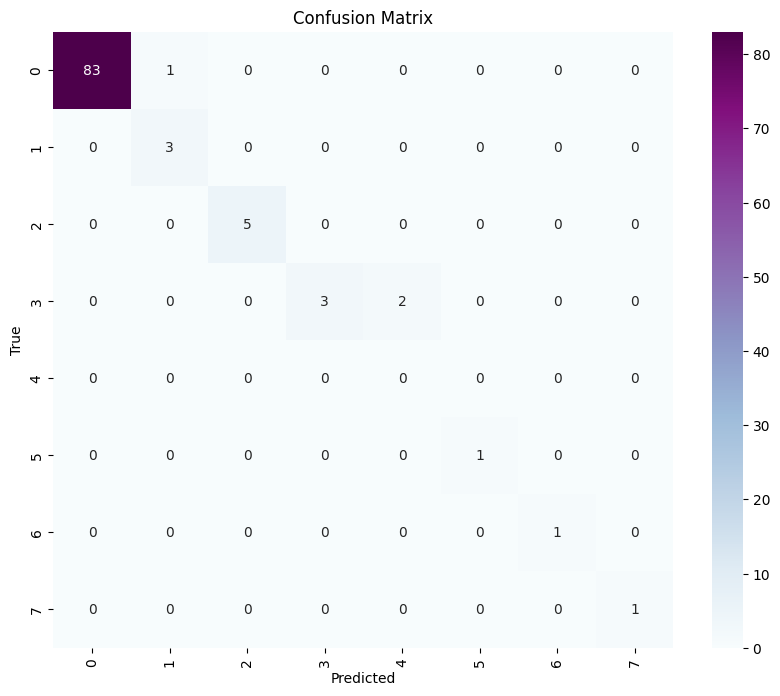

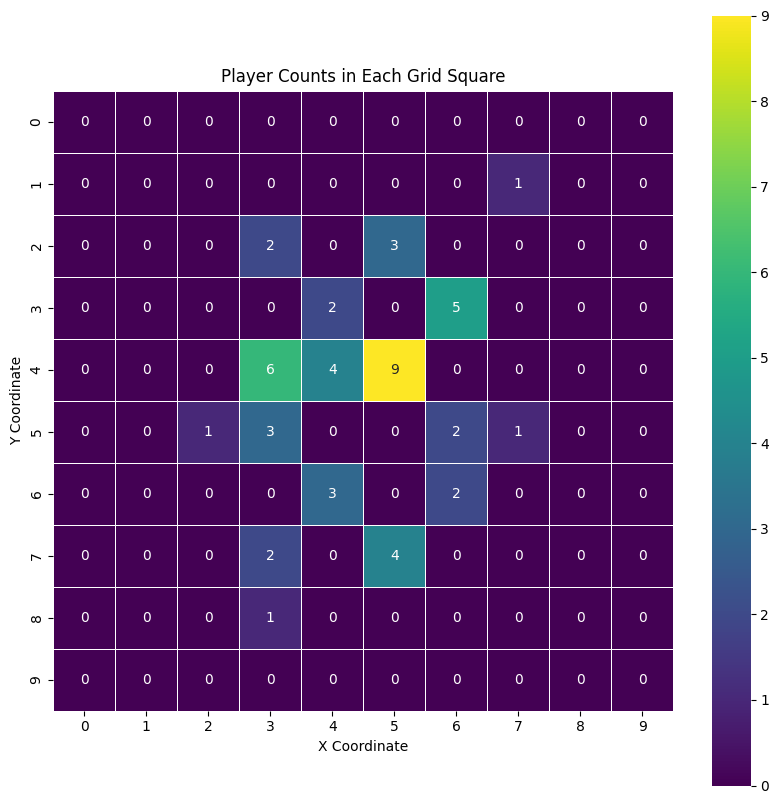

In [33]:
nn_predictions = np.round(np.abs(nn_model.predict(X_test)),0).flatten()
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)
r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)
cm = confusion_matrix(y_test, nn_predictions)
print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

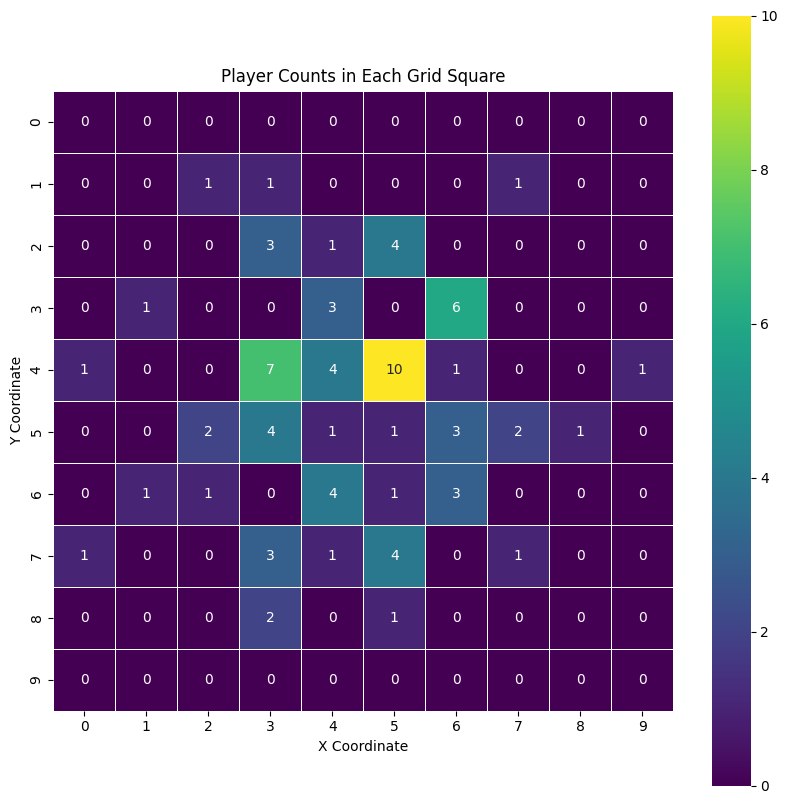

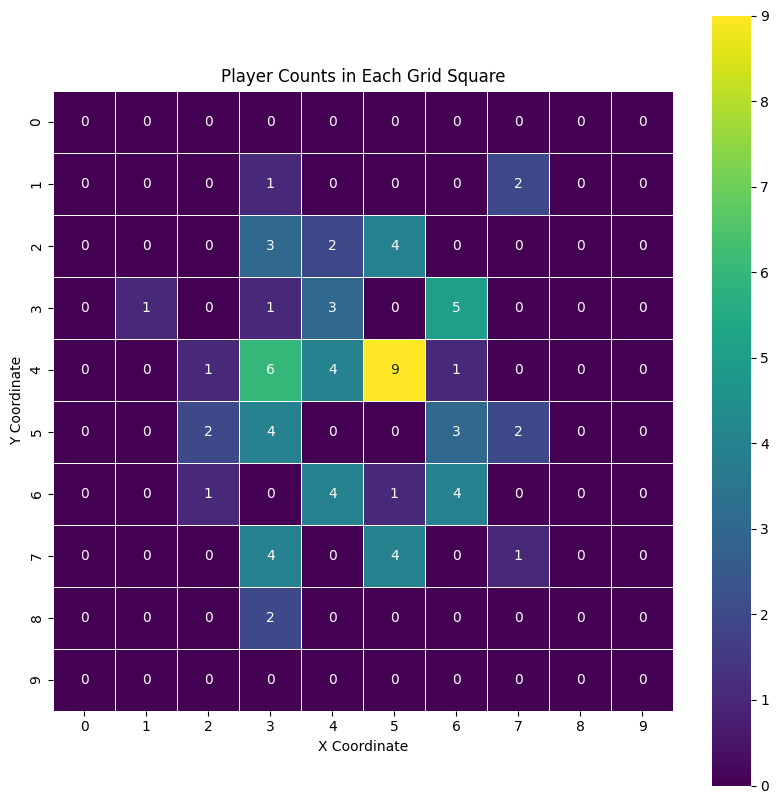

In [95]:
grid_data = np.zeros((10, 10))
grid_shape = (grid_size, grid_size) 
a = np.array(test_df['Player_Category'])
plt.figure(figsize=(10, 10))
sns.heatmap(a.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.regularizers import l1_l2
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.callbacks import EarlyStopping

# # Define the neural network architecture
# nn_model = Sequential()
# nn_model.add(Dense(64, input_dim=3, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
# nn_model.add(Dropout(0.2))
# nn_model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
# nn_model.add(Dense(1, activation='linear'))

# # Compile the model
# optimizer = RMSprop(learning_rate=0.0001)
# nn_model.compile(loss='mean_squared_error', optimizer=optimizer)

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=1000, restore_best_weights=True)

# # Fit the model with validation data
# history = nn_model.fit(
#     X_train, 
#     y_train, 
#     epochs=1000, 
#     batch_size=10, 
#     validation_data=(X_val, y_val),
#     callbacks=[early_stopping]
# )


In [29]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# # Model Configuration
# input_shape = (X_train.shape[1], 1)  # Modify based on your input shape
# learning_rate = 0.001

# # Define the Neural Network Architecture
# nn_model = Sequential()

# # First LSTM Layer
# nn_model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
# nn_model.add(BatchNormalization())
# nn_model.add(Dropout(0.2))

# # Second LSTM Layer
# nn_model.add(LSTM(32, return_sequences=False))
# nn_model.add(BatchNormalization())
# nn_model.add(Dropout(0.2))

# # Dense Layer
# nn_model.add(Dense(32, activation='relu'))
# nn_model.add(Dropout(0.2))

# # Output Layer
# nn_model.add(Dense(1, activation='linear'))

# # Compile the Model
# optimizer = Adam(learning_rate=learning_rate)
# nn_model.compile(loss='mean_squared_error', optimizer=optimizer)

# # Fit the Model
# history = nn_model.fit(
#     X_train, y_train, 
#     epochs=500, 
#     batch_size=10, 
#     validation_data=(X_val, y_val),
#     verbose=2
# )


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

nn_model_new = Sequential()
nn_model_new.add(Dense(128, input_dim=3, activation='relu'))
nn_model_new.add(BatchNormalization())
nn_model_new.add(Dropout(0.2))
nn_model_new.add(Dense(256, activation='relu'))
nn_model_new.add(BatchNormalization())
nn_model_new.add(Dropout(0.6))
nn_model_new.add(Dense(128, activation='relu'))
nn_model_new.add(BatchNormalization())
nn_model_new.add(Dropout(0.6))
nn_model_new.add(Dense(64, activation='relu'))
nn_model_new.add(BatchNormalization())
nn_model_new.add(Dropout(0.6))
nn_model_new.add(Dense(32, activation='relu'))
nn_model_new.add(BatchNormalization())
nn_model_new.add(Dropout(0.6))
nn_model_new.add(Dense(16, activation='relu'))
nn_model_new.add(BatchNormalization())
nn_model_new.add(Dropout(0.6))
nn_model_new.add(Dense(8, activation='relu'))
nn_model_new.add(BatchNormalization())
nn_model_new.add(Dropout(0.2))
nn_model_new.add(Dense(1, activation='linear' ))  


nn_model_new.compile(loss='mean_squared_error', optimizer='adam')


early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)


history = nn_model_new.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    batch_size=10, 
    validation_data=(X_val, y_val),  
    callbacks=[early_stopping]
)



Epoch 1/1000
10/10 [==============================] - 2s 68ms/step - loss: 4.3382 - val_loss: 3.3840
Epoch 2/1000
10/10 [==============================] - 0s 30ms/step - loss: 4.8549 - val_loss: 3.3909
Epoch 3/1000
10/10 [==============================] - 0s 37ms/step - loss: 4.8221 - val_loss: 3.4142
Epoch 4/1000
10/10 [==============================] - 0s 30ms/step - loss: 4.4158 - val_loss: 3.4000
Epoch 5/1000
10/10 [==============================] - 0s 28ms/step - loss: 4.5141 - val_loss: 3.3999
Epoch 6/1000
10/10 [==============================] - 0s 33ms/step - loss: 4.5947 - val_loss: 3.3746
Epoch 7/1000
10/10 [==============================] - 0s 29ms/step - loss: 4.2147 - val_loss: 3.3682
Epoch 8/1000
10/10 [==============================] - 0s 30ms/step - loss: 4.4268 - val_loss: 3.3556
Epoch 9/1000
10/10 [==============================] - 0s 34ms/step - loss: 3.9380 - val_loss: 3.3332
Epoch 10/1000
10/10 [==============================] - 0s 31ms/step - loss: 4.3763 - val_lo

10/10 [==============================] - 0s 30ms/step - loss: 2.8168 - val_loss: 2.5294
Epoch 82/1000
10/10 [==============================] - 0s 29ms/step - loss: 3.2337 - val_loss: 2.5308
Epoch 83/1000
10/10 [==============================] - 0s 29ms/step - loss: 3.1528 - val_loss: 2.5277
Epoch 84/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.5303 - val_loss: 2.5276
Epoch 85/1000
10/10 [==============================] - 0s 29ms/step - loss: 3.1126 - val_loss: 2.5384
Epoch 86/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.8433 - val_loss: 2.5464
Epoch 87/1000
10/10 [==============================] - 0s 31ms/step - loss: 2.6938 - val_loss: 2.5144
Epoch 88/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.9605 - val_loss: 2.5091
Epoch 89/1000
10/10 [==============================] - 0s 29ms/step - loss: 3.1898 - val_loss: 2.5147
Epoch 90/1000
10/10 [==============================] - 0s 31ms/step - loss: 3.0821 - val_loss: 2

Epoch 161/1000
10/10 [==============================] - 0s 32ms/step - loss: 2.7285 - val_loss: 2.0287
Epoch 162/1000
10/10 [==============================] - 0s 32ms/step - loss: 2.3139 - val_loss: 2.0214
Epoch 163/1000
10/10 [==============================] - 0s 33ms/step - loss: 2.5684 - val_loss: 1.9959
Epoch 164/1000
10/10 [==============================] - 0s 35ms/step - loss: 2.4946 - val_loss: 1.9699
Epoch 165/1000
10/10 [==============================] - 0s 31ms/step - loss: 2.9209 - val_loss: 1.9642
Epoch 166/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.4510 - val_loss: 1.9390
Epoch 167/1000
10/10 [==============================] - 0s 31ms/step - loss: 2.1307 - val_loss: 1.8782
Epoch 168/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.4462 - val_loss: 1.8203
Epoch 169/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.4341 - val_loss: 1.7928
Epoch 170/1000
10/10 [==============================] - 0s 30ms/step - lo

10/10 [==============================] - 0s 31ms/step - loss: 2.0426 - val_loss: 1.2094
Epoch 241/1000
10/10 [==============================] - 0s 34ms/step - loss: 2.2411 - val_loss: 1.2027
Epoch 242/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.9783 - val_loss: 1.2040
Epoch 243/1000
10/10 [==============================] - 0s 32ms/step - loss: 2.0602 - val_loss: 1.1956
Epoch 244/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.1935 - val_loss: 1.1991
Epoch 245/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.3350 - val_loss: 1.2034
Epoch 246/1000
10/10 [==============================] - 0s 28ms/step - loss: 2.3980 - val_loss: 1.2175
Epoch 247/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.1872 - val_loss: 1.2048
Epoch 248/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.7376 - val_loss: 1.2008
Epoch 249/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.6268 - va

10/10 [==============================] - 0s 30ms/step - loss: 1.9996 - val_loss: 1.2195
Epoch 320/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.0138 - val_loss: 1.1995
Epoch 321/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.9605 - val_loss: 1.1597
Epoch 322/1000
10/10 [==============================] - 0s 33ms/step - loss: 2.0529 - val_loss: 1.1523
Epoch 323/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.9300 - val_loss: 1.1733
Epoch 324/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.1323 - val_loss: 1.1693
Epoch 325/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.7372 - val_loss: 1.1696
Epoch 326/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.9418 - val_loss: 1.1670
Epoch 327/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.9321 - val_loss: 1.1682
Epoch 328/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.7119 - va

10/10 [==============================] - 0s 28ms/step - loss: 2.2855 - val_loss: 1.0905
Epoch 399/1000
10/10 [==============================] - 0s 32ms/step - loss: 2.0773 - val_loss: 1.0958
Epoch 400/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.8562 - val_loss: 1.0929
Epoch 401/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.9937 - val_loss: 1.0795
Epoch 402/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.2384 - val_loss: 1.0884
Epoch 403/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.6652 - val_loss: 1.0881
Epoch 404/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.5048 - val_loss: 1.1104
Epoch 405/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.7596 - val_loss: 1.1209
Epoch 406/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.8414 - val_loss: 1.1216
Epoch 407/1000
10/10 [==============================] - 0s 31ms/step - loss: 2.3023 - va

10/10 [==============================] - 0s 34ms/step - loss: 1.5958 - val_loss: 1.0320
Epoch 478/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.9359 - val_loss: 1.0491
Epoch 479/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.4094 - val_loss: 1.0245
Epoch 480/1000
10/10 [==============================] - 0s 28ms/step - loss: 2.0048 - val_loss: 1.0239
Epoch 481/1000
10/10 [==============================] - 0s 31ms/step - loss: 2.1319 - val_loss: 1.0516
Epoch 482/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.4348 - val_loss: 1.0730
Epoch 483/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.2050 - val_loss: 1.0679
Epoch 484/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.1079 - val_loss: 1.0574
Epoch 485/1000
10/10 [==============================] - 0s 33ms/step - loss: 1.9690 - val_loss: 1.0852
Epoch 486/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.3566 - va

10/10 [==============================] - 0s 30ms/step - loss: 1.7357 - val_loss: 0.8690
Epoch 557/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.5312 - val_loss: 0.8849
Epoch 558/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.5552 - val_loss: 0.9244
Epoch 559/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.7633 - val_loss: 0.9286
Epoch 560/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.3940 - val_loss: 0.9148
Epoch 561/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.9867 - val_loss: 0.9022
Epoch 562/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.3683 - val_loss: 0.8990
Epoch 563/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.4817 - val_loss: 0.8943
Epoch 564/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.9313 - val_loss: 0.8761
Epoch 565/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.5635 - va

10/10 [==============================] - 0s 32ms/step - loss: 1.5062 - val_loss: 0.7653
Epoch 636/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.7411 - val_loss: 0.7433
Epoch 637/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.4954 - val_loss: 0.7368
Epoch 638/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.5543 - val_loss: 0.7840
Epoch 639/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.6313 - val_loss: 0.8209
Epoch 640/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.4340 - val_loss: 0.8121
Epoch 641/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.9638 - val_loss: 0.8294
Epoch 642/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.1597 - val_loss: 0.8060
Epoch 643/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.2246 - val_loss: 0.7351
Epoch 644/1000
10/10 [==============================] - 0s 33ms/step - loss: 1.5200 - va

10/10 [==============================] - 0s 29ms/step - loss: 1.5188 - val_loss: 0.6853
Epoch 715/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.4240 - val_loss: 0.6711
Epoch 716/1000
10/10 [==============================] - 0s 33ms/step - loss: 2.1173 - val_loss: 0.7032
Epoch 717/1000
10/10 [==============================] - 0s 33ms/step - loss: 1.9117 - val_loss: 0.6867
Epoch 718/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.6090 - val_loss: 0.7173
Epoch 719/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.1304 - val_loss: 0.7233
Epoch 720/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.1659 - val_loss: 0.7366
Epoch 721/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.2258 - val_loss: 0.7326
Epoch 722/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.4604 - val_loss: 0.7717
Epoch 723/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.8714 - va

10/10 [==============================] - 0s 30ms/step - loss: 1.8227 - val_loss: 0.6407
Epoch 794/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.6691 - val_loss: 0.6848
Epoch 795/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.2624 - val_loss: 0.7146
Epoch 796/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.7094 - val_loss: 0.7660
Epoch 797/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.6863 - val_loss: 0.8027
Epoch 798/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.5020 - val_loss: 0.8028
Epoch 799/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.9589 - val_loss: 0.8167
Epoch 800/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.1106 - val_loss: 0.7697
Epoch 801/1000
10/10 [==============================] - 0s 28ms/step - loss: 1.7650 - val_loss: 0.7005
Epoch 802/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.6419 - va

10/10 [==============================] - 0s 32ms/step - loss: 1.9917 - val_loss: 0.6662
Epoch 873/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.7127 - val_loss: 0.6285
Epoch 874/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.5393 - val_loss: 0.5929
Epoch 875/1000
10/10 [==============================] - 0s 33ms/step - loss: 1.7351 - val_loss: 0.5448
Epoch 876/1000
10/10 [==============================] - 0s 35ms/step - loss: 1.7346 - val_loss: 0.5269
Epoch 877/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.5889 - val_loss: 0.5016
Epoch 878/1000
10/10 [==============================] - 0s 32ms/step - loss: 1.5145 - val_loss: 0.5165
Epoch 879/1000
10/10 [==============================] - 0s 30ms/step - loss: 1.5336 - val_loss: 0.5787
Epoch 880/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.2527 - val_loss: 0.5588
Epoch 881/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.5113 - va

10/10 [==============================] - 0s 29ms/step - loss: 1.5215 - val_loss: 0.5150
Epoch 952/1000
10/10 [==============================] - 0s 35ms/step - loss: 1.4675 - val_loss: 0.4524
Epoch 953/1000
10/10 [==============================] - 0s 36ms/step - loss: 1.3789 - val_loss: 0.4446
Epoch 954/1000
10/10 [==============================] - 0s 28ms/step - loss: 1.4249 - val_loss: 0.4649
Epoch 955/1000
10/10 [==============================] - 0s 28ms/step - loss: 1.2977 - val_loss: 0.5026
Epoch 956/1000
10/10 [==============================] - 0s 27ms/step - loss: 1.1137 - val_loss: 0.4967
Epoch 957/1000
10/10 [==============================] - 0s 27ms/step - loss: 1.2402 - val_loss: 0.5135
Epoch 958/1000
10/10 [==============================] - 0s 28ms/step - loss: 1.2659 - val_loss: 0.5460
Epoch 959/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.6059 - val_loss: 0.5980
Epoch 960/1000
10/10 [==============================] - 0s 29ms/step - loss: 2.0776 - va

4/4 [==============================] - 0s 5ms/step
Neural Network MSE: 0.61
R-squared: 0.7763601701129197
Total number of errors:  31 in 100
Accuracy:  69.0


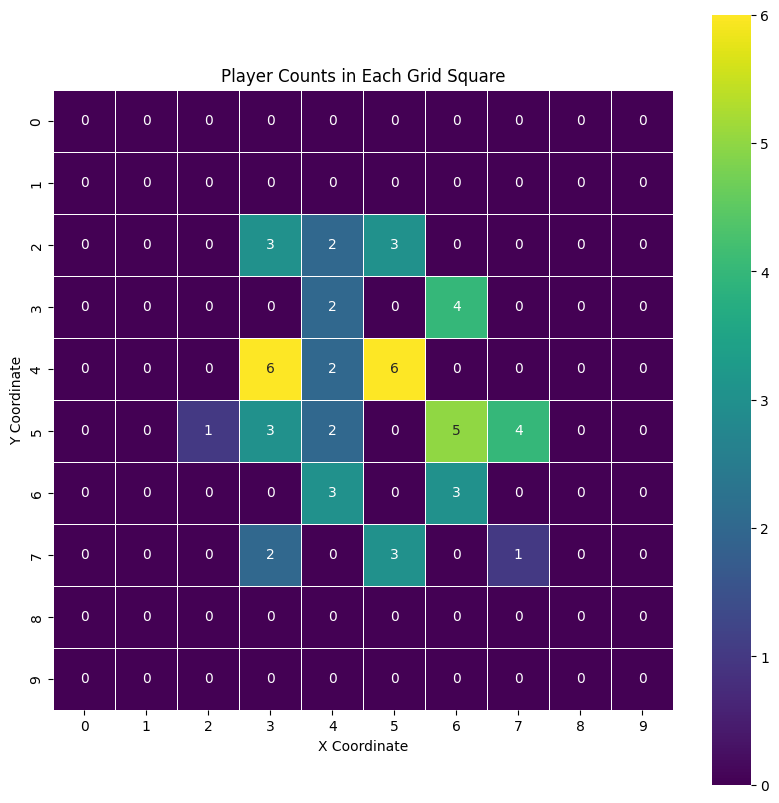

In [43]:
nn_predictions = np.round(np.abs(nn_model_new.predict(X_test)),0).flatten()
# for i in range (len(nn_predictions)):
#     if nn_predictions[i]==21:
#         nn_predictions[i] = 3

nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)
r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)
cm = confusion_matrix(y_test, nn_predictions)
print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)

plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [44]:
print(nn_predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 4. 0. 0. 0. 0. 0. 0. 6. 2. 6. 0. 0.
 0. 0. 0. 0. 1. 3. 2. 0. 5. 4. 0. 0. 0. 0. 0. 0. 3. 0. 3. 0. 0. 0. 0. 0.
 0. 2. 0. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


4/4 [==============================] - 0s 4ms/step
Accuracy:  56.00000000000001


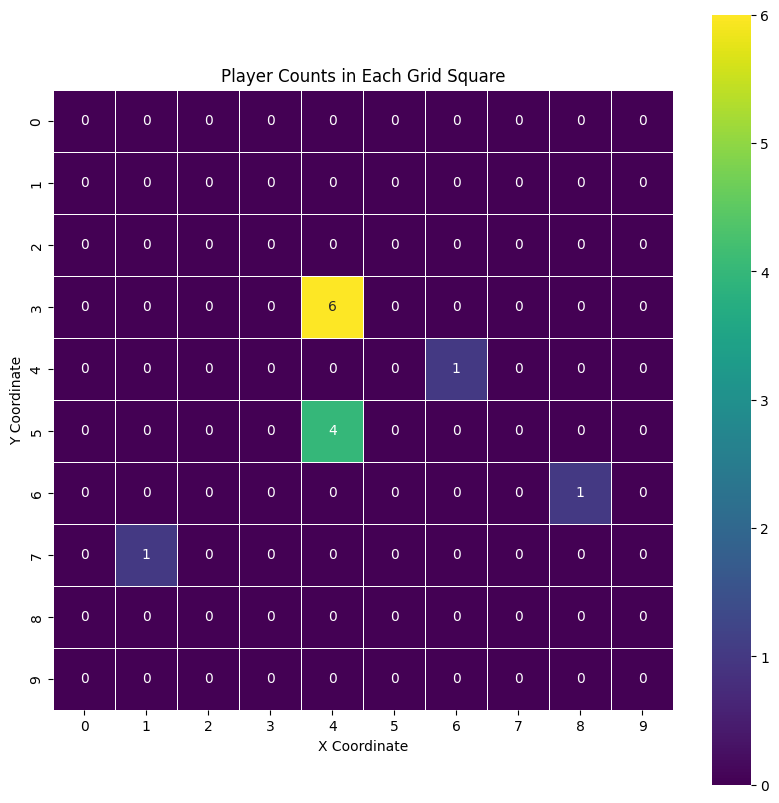

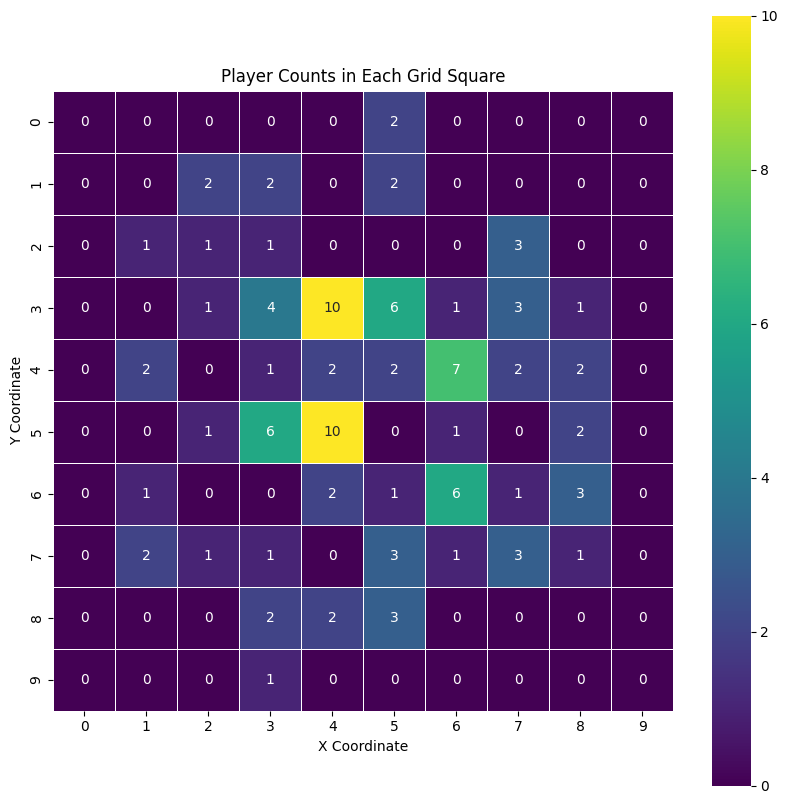

In [45]:
nn_predictions = np.round(np.abs(nn_model_new.predict(X_test_new_map)),0).flatten()
nn_mse = mean_squared_error(y_test_new_map, nn_predictions)
r2 = r2_score(y_test_new_map, nn_predictions)
cm = confusion_matrix(y_test_new_map, nn_predictions)
print('Accuracy: ', np.sum(y_test_new_map == nn_predictions) / len(y_test_new_map) * 100)


plt.figure(figsize=(10, 10))
sns.heatmap(nn_predictions.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

grid_data = np.zeros((10, 10))
grid_shape = (grid_size, grid_size) 
a = np.array(test_df_new_map['Player_Category'])
plt.figure(figsize=(10, 10))
sns.heatmap(a.reshape(grid_shape), annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [43]:
nn_model_new.save('nn_model_new.h5')

In [ ]:
import tensorflow.keras as keras
nn_model = keras.models.load_model('nn_model_dropout.h5')